In [93]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer

In [94]:
sentences = ['I love my dog', 'I love my cat']
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [95]:
sentences = ['I love my dog', 'I love my cat',
             'you love my dog!', 'do you think my dog is amazing']
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
print(word_index)
print(sequences)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


# Padding

In [96]:
padded = pad_sequences(sequences,maxlen=6,truncating=trunc_type)

In [97]:
padded

array([[ 0,  0,  5,  3,  2,  4],
       [ 0,  0,  5,  3,  2,  7],
       [ 0,  0,  6,  3,  2,  4],
       [ 8,  6,  9,  2,  4, 10]])

# Embedding
show difference degree from similarity

In [98]:
#IMDB
import tensorflow_datasets as tfds

In [99]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
padded = pad_sequences(sequences, padding='post',
                      truncating='post', maxlen=5)
print(padded)

[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


In [100]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

W0910 14:07:27.593922  5184 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [101]:
import numpy as np
# data are tensors foramt
train_data, test_data = imdb['train'], imdb['test'] 

In [102]:
training_sentences = []
trainging_labels = []
testing_sentences =[]
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    trainging_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(trainging_labels)
testing_labels_final = np.array(testing_labels)

In [103]:
#Hyper parameters
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
oov_tok = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [104]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b'just because someone is under the age of 10 does not mean they are stupid if your child likes this film you 'd better have him her tested i am continually amazed at how so many people can be involved in something that turns out so bad this film is a showcase for digital <OOV> and nothing else the writing is horrid i can 't remember when i 've heard such bad dialogue the songs are beyond wretched the acting is sub par but then the actors were not given much who decided to employ joey <OOV> he cannot sing
b'Just because someone is under the age of 10 does not mean they are stupid. If your child likes this film you\'d better have him/her tested. I am continually amazed at how so many people can be involved in something that turns out so bad. This "film" is a showcase for digital wizardry AND NOTHING ELSE. The writing is horrid. I can\'t remember when I\'ve heard such bad dialogue. The songs are beyond wretched. The acting is sub-par but then the actors were not given much. Who decided t

In [105]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),#Flatten(),  # 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [106]:
num_epochs = 15
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - ETA: 20:10 - loss: 0.6928 - accuracy: 0.531 - ETA: 2:03 - loss: 0.6929 - accuracy: 0.503 - ETA: 1:06 - loss: 0.6926 - accuracy: 0.50 - ETA: 47s - loss: 0.6921 - accuracy: 0.5185 - ETA: 34s - loss: 0.6920 - accuracy: 0.508 - ETA: 27s - loss: 0.6914 - accuracy: 0.530 - ETA: 22s - loss: 0.6909 - accuracy: 0.548 - ETA: 19s - loss: 0.6902 - accuracy: 0.551 - ETA: 17s - loss: 0.6892 - accuracy: 0.553 - ETA: 14s - loss: 0.6888 - accuracy: 0.548 - ETA: 13s - loss: 0.6883 - accuracy: 0.545 - ETA: 11s - loss: 0.6874 - accuracy: 0.555 - ETA: 11s - loss: 0.6866 - accuracy: 0.564 - ETA: 10s - loss: 0.6859 - accuracy: 0.568 - ETA: 9s - loss: 0.6851 - accuracy: 0.570 - ETA: 8s - loss: 0.6843 - accuracy: 0.57 - ETA: 8s - loss: 0.6832 - accuracy: 0.58 - ETA: 8s - loss: 0.6822 - accuracy: 0.59 - ETA: 7s - loss: 0.6812 - accuracy: 0.59 - ETA: 7s - loss: 0.6801 - accuracy: 0.60 - ETA: 6s - loss: 0.6

25000/25000 [==============================] - ETA: 6s - loss: 0.2944 - accuracy: 0.90 - ETA: 5s - loss: 0.2653 - accuracy: 0.90 - ETA: 5s - loss: 0.2606 - accuracy: 0.90 - ETA: 4s - loss: 0.2631 - accuracy: 0.89 - ETA: 4s - loss: 0.2769 - accuracy: 0.89 - ETA: 4s - loss: 0.2793 - accuracy: 0.89 - ETA: 4s - loss: 0.2813 - accuracy: 0.89 - ETA: 4s - loss: 0.2788 - accuracy: 0.89 - ETA: 4s - loss: 0.2838 - accuracy: 0.89 - ETA: 4s - loss: 0.2781 - accuracy: 0.89 - ETA: 4s - loss: 0.2844 - accuracy: 0.89 - ETA: 4s - loss: 0.2863 - accuracy: 0.89 - ETA: 3s - loss: 0.2865 - accuracy: 0.89 - ETA: 3s - loss: 0.2869 - accuracy: 0.88 - ETA: 3s - loss: 0.2907 - accuracy: 0.88 - ETA: 3s - loss: 0.2913 - accuracy: 0.88 - ETA: 3s - loss: 0.2935 - accuracy: 0.88 - ETA: 3s - loss: 0.2906 - accuracy: 0.88 - ETA: 3s - loss: 0.2910 - accuracy: 0.88 - ETA: 3s - loss: 0.2915 - accuracy: 0.88 - ETA: 2s - loss: 0.2926 - accuracy: 0.88 - ETA: 2s - loss: 0.2923 - accuracy: 0.88 - ETA: 2s - loss: 0.2916 - accu

25000/25000 [==============================] - ETA: 4s - loss: 0.1815 - accuracy: 0.96 - ETA: 4s - loss: 0.1726 - accuracy: 0.96 - ETA: 4s - loss: 0.1772 - accuracy: 0.95 - ETA: 4s - loss: 0.1885 - accuracy: 0.94 - ETA: 4s - loss: 0.1918 - accuracy: 0.94 - ETA: 4s - loss: 0.2030 - accuracy: 0.93 - ETA: 3s - loss: 0.2117 - accuracy: 0.92 - ETA: 3s - loss: 0.2202 - accuracy: 0.92 - ETA: 3s - loss: 0.2223 - accuracy: 0.92 - ETA: 3s - loss: 0.2223 - accuracy: 0.92 - ETA: 3s - loss: 0.2238 - accuracy: 0.91 - ETA: 3s - loss: 0.2240 - accuracy: 0.91 - ETA: 3s - loss: 0.2205 - accuracy: 0.91 - ETA: 3s - loss: 0.2193 - accuracy: 0.91 - ETA: 3s - loss: 0.2197 - accuracy: 0.91 - ETA: 3s - loss: 0.2182 - accuracy: 0.91 - ETA: 3s - loss: 0.2153 - accuracy: 0.91 - ETA: 3s - loss: 0.2160 - accuracy: 0.91 - ETA: 3s - loss: 0.2178 - accuracy: 0.91 - ETA: 2s - loss: 0.2193 - accuracy: 0.91 - ETA: 2s - loss: 0.2223 - accuracy: 0.91 - ETA: 2s - loss: 0.2243 - accuracy: 0.91 - ETA: 2s - loss: 0.2235 - accu

25000/25000 [==============================] - ETA: 6s - loss: 0.3916 - accuracy: 0.87 - ETA: 4s - loss: 0.1919 - accuracy: 0.94 - ETA: 4s - loss: 0.1922 - accuracy: 0.93 - ETA: 4s - loss: 0.1883 - accuracy: 0.94 - ETA: 3s - loss: 0.1818 - accuracy: 0.94 - ETA: 3s - loss: 0.1824 - accuracy: 0.94 - ETA: 3s - loss: 0.1813 - accuracy: 0.94 - ETA: 3s - loss: 0.1767 - accuracy: 0.94 - ETA: 3s - loss: 0.1685 - accuracy: 0.94 - ETA: 3s - loss: 0.1680 - accuracy: 0.94 - ETA: 3s - loss: 0.1742 - accuracy: 0.94 - ETA: 3s - loss: 0.1743 - accuracy: 0.94 - ETA: 3s - loss: 0.1761 - accuracy: 0.94 - ETA: 3s - loss: 0.1755 - accuracy: 0.94 - ETA: 3s - loss: 0.1804 - accuracy: 0.93 - ETA: 3s - loss: 0.1783 - accuracy: 0.93 - ETA: 3s - loss: 0.1768 - accuracy: 0.94 - ETA: 3s - loss: 0.1765 - accuracy: 0.94 - ETA: 3s - loss: 0.1790 - accuracy: 0.94 - ETA: 3s - loss: 0.1774 - accuracy: 0.94 - ETA: 3s - loss: 0.1788 - accuracy: 0.94 - ETA: 3s - loss: 0.1775 - accuracy: 0.94 - ETA: 3s - loss: 0.1795 - accu

25000/25000 [==============================] - ETA: 5s - loss: 0.2802 - accuracy: 0.90 - ETA: 4s - loss: 0.1435 - accuracy: 0.94 - ETA: 4s - loss: 0.1300 - accuracy: 0.95 - ETA: 4s - loss: 0.1327 - accuracy: 0.95 - ETA: 4s - loss: 0.1425 - accuracy: 0.95 - ETA: 4s - loss: 0.1349 - accuracy: 0.95 - ETA: 4s - loss: 0.1384 - accuracy: 0.95 - ETA: 4s - loss: 0.1437 - accuracy: 0.95 - ETA: 3s - loss: 0.1426 - accuracy: 0.95 - ETA: 3s - loss: 0.1452 - accuracy: 0.95 - ETA: 3s - loss: 0.1495 - accuracy: 0.95 - ETA: 3s - loss: 0.1525 - accuracy: 0.94 - ETA: 3s - loss: 0.1517 - accuracy: 0.94 - ETA: 3s - loss: 0.1546 - accuracy: 0.94 - ETA: 3s - loss: 0.1546 - accuracy: 0.94 - ETA: 3s - loss: 0.1555 - accuracy: 0.94 - ETA: 3s - loss: 0.1539 - accuracy: 0.94 - ETA: 3s - loss: 0.1533 - accuracy: 0.94 - ETA: 3s - loss: 0.1529 - accuracy: 0.94 - ETA: 3s - loss: 0.1508 - accuracy: 0.94 - ETA: 2s - loss: 0.1505 - accuracy: 0.94 - ETA: 2s - loss: 0.1512 - accuracy: 0.94 - ETA: 2s - loss: 0.1513 - accu

25000/25000 [==============================] - ETA: 6s - loss: 0.0530 - accuracy: 1.00 - ETA: 3s - loss: 0.1407 - accuracy: 0.95 - ETA: 3s - loss: 0.1490 - accuracy: 0.95 - ETA: 3s - loss: 0.1316 - accuracy: 0.96 - ETA: 3s - loss: 0.1320 - accuracy: 0.95 - ETA: 3s - loss: 0.1333 - accuracy: 0.95 - ETA: 3s - loss: 0.1363 - accuracy: 0.95 - ETA: 3s - loss: 0.1342 - accuracy: 0.95 - ETA: 3s - loss: 0.1325 - accuracy: 0.95 - ETA: 3s - loss: 0.1301 - accuracy: 0.96 - ETA: 3s - loss: 0.1298 - accuracy: 0.96 - ETA: 3s - loss: 0.1325 - accuracy: 0.95 - ETA: 3s - loss: 0.1305 - accuracy: 0.95 - ETA: 3s - loss: 0.1326 - accuracy: 0.95 - ETA: 3s - loss: 0.1327 - accuracy: 0.95 - ETA: 3s - loss: 0.1331 - accuracy: 0.95 - ETA: 3s - loss: 0.1326 - accuracy: 0.95 - ETA: 3s - loss: 0.1342 - accuracy: 0.95 - ETA: 3s - loss: 0.1317 - accuracy: 0.95 - ETA: 2s - loss: 0.1314 - accuracy: 0.95 - ETA: 2s - loss: 0.1329 - accuracy: 0.95 - ETA: 2s - loss: 0.1323 - accuracy: 0.95 - ETA: 2s - loss: 0.1341 - accu

25000/25000 [==============================] - ETA: 7s - loss: 0.0920 - accuracy: 0.93 - ETA: 4s - loss: 0.0811 - accuracy: 0.96 - ETA: 4s - loss: 0.0977 - accuracy: 0.96 - ETA: 4s - loss: 0.1015 - accuracy: 0.96 - ETA: 4s - loss: 0.1012 - accuracy: 0.97 - ETA: 3s - loss: 0.0961 - accuracy: 0.97 - ETA: 3s - loss: 0.1009 - accuracy: 0.97 - ETA: 3s - loss: 0.0976 - accuracy: 0.97 - ETA: 3s - loss: 0.1006 - accuracy: 0.96 - ETA: 3s - loss: 0.1040 - accuracy: 0.96 - ETA: 3s - loss: 0.1053 - accuracy: 0.96 - ETA: 3s - loss: 0.1099 - accuracy: 0.96 - ETA: 3s - loss: 0.1125 - accuracy: 0.96 - ETA: 3s - loss: 0.1107 - accuracy: 0.96 - ETA: 3s - loss: 0.1106 - accuracy: 0.96 - ETA: 3s - loss: 0.1093 - accuracy: 0.96 - ETA: 3s - loss: 0.1099 - accuracy: 0.96 - ETA: 3s - loss: 0.1095 - accuracy: 0.96 - ETA: 3s - loss: 0.1121 - accuracy: 0.96 - ETA: 3s - loss: 0.1110 - accuracy: 0.96 - ETA: 3s - loss: 0.1131 - accuracy: 0.96 - ETA: 3s - loss: 0.1136 - accuracy: 0.96 - ETA: 3s - loss: 0.1119 - accu

25000/25000 [==============================] - ETA: 5s - loss: 0.0190 - accuracy: 1.00 - ETA: 5s - loss: 0.0902 - accuracy: 0.97 - ETA: 4s - loss: 0.1086 - accuracy: 0.96 - ETA: 4s - loss: 0.0977 - accuracy: 0.97 - ETA: 4s - loss: 0.1067 - accuracy: 0.96 - ETA: 4s - loss: 0.0922 - accuracy: 0.97 - ETA: 3s - loss: 0.0893 - accuracy: 0.97 - ETA: 3s - loss: 0.0877 - accuracy: 0.97 - ETA: 3s - loss: 0.0915 - accuracy: 0.97 - ETA: 3s - loss: 0.0901 - accuracy: 0.97 - ETA: 3s - loss: 0.0919 - accuracy: 0.97 - ETA: 3s - loss: 0.0910 - accuracy: 0.97 - ETA: 3s - loss: 0.0897 - accuracy: 0.97 - ETA: 3s - loss: 0.0923 - accuracy: 0.97 - ETA: 3s - loss: 0.0951 - accuracy: 0.97 - ETA: 3s - loss: 0.0939 - accuracy: 0.97 - ETA: 3s - loss: 0.0925 - accuracy: 0.97 - ETA: 2s - loss: 0.0942 - accuracy: 0.97 - ETA: 2s - loss: 0.0967 - accuracy: 0.97 - ETA: 2s - loss: 0.0978 - accuracy: 0.97 - ETA: 2s - loss: 0.1005 - accuracy: 0.97 - ETA: 2s - loss: 0.0989 - accuracy: 0.97 - ETA: 2s - loss: 0.0974 - accu

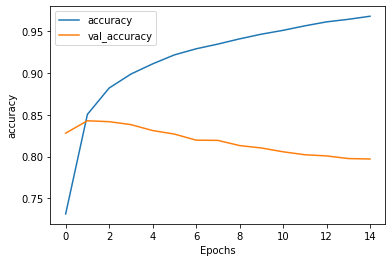

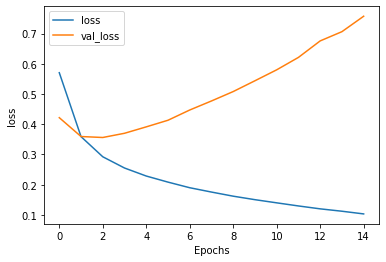

In [107]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("NlpModel.h5")

# LSTM

In [115]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 16)           160000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 100, 32)           4224      
_________________________________________________________________
bidirectional_9 (Bidirection (None, 16)                2624      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 167,137
Trainable params: 167,137
Non-trainable params: 0
_________________________________________________________________


In [116]:
num_epochs = 15
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15


 5888/25000 [======>.......................] - ETA: 1:31:44 - loss: 0.6929 - accuracy: 0.500 - ETA: 46:46 - loss: 0.6931 - accuracy: 0.5000  - ETA: 31:39 - loss: 0.6931 - accuracy: 0.489 - ETA: 24:05 - loss: 0.6931 - accuracy: 0.484 - ETA: 19:33 - loss: 0.6931 - accuracy: 0.475 - ETA: 16:32 - loss: 0.6931 - accuracy: 0.484 - ETA: 14:23 - loss: 0.6931 - accuracy: 0.504 - ETA: 12:47 - loss: 0.6931 - accuracy: 0.503 - ETA: 11:32 - loss: 0.6931 - accuracy: 0.506 - ETA: 10:31 - loss: 0.6929 - accuracy: 0.518 - ETA: 9:41 - loss: 0.6927 - accuracy: 0.531 - ETA: 9:00 - loss: 0.6927 - accuracy: 0.52 - ETA: 8:25 - loss: 0.6927 - accuracy: 0.52 - ETA: 7:55 - loss: 0.6926 - accuracy: 0.53 - ETA: 7:30 - loss: 0.6923 - accuracy: 0.53 - ETA: 7:07 - loss: 0.6924 - accuracy: 0.53 - ETA: 6:47 - loss: 0.6924 - accuracy: 0.53 - ETA: 6:29 - loss: 0.6921 - accuracy: 0.53 - ETA: 6:13 - loss: 0.6921 - accuracy: 0.53 - ETA: 5:58 - loss: 0.6924 - accuracy: 0.53 - ETA: 5:45 - loss: 0.6924 - accuracy: 0.52 - ETA:

11840/25000 [=============>................] - ETA: 1:49 - loss: 0.6210 - accuracy: 0.63 - ETA: 1:48 - loss: 0.6197 - accuracy: 0.63 - ETA: 1:48 - loss: 0.6187 - accuracy: 0.63 - ETA: 1:48 - loss: 0.6181 - accuracy: 0.63 - ETA: 1:47 - loss: 0.6171 - accuracy: 0.63 - ETA: 1:47 - loss: 0.6165 - accuracy: 0.63 - ETA: 1:47 - loss: 0.6164 - accuracy: 0.63 - ETA: 1:46 - loss: 0.6164 - accuracy: 0.63 - ETA: 1:46 - loss: 0.6155 - accuracy: 0.63 - ETA: 1:46 - loss: 0.6149 - accuracy: 0.63 - ETA: 1:45 - loss: 0.6146 - accuracy: 0.63 - ETA: 1:45 - loss: 0.6142 - accuracy: 0.64 - ETA: 1:45 - loss: 0.6133 - accuracy: 0.64 - ETA: 1:44 - loss: 0.6133 - accuracy: 0.64 - ETA: 1:44 - loss: 0.6123 - accuracy: 0.64 - ETA: 1:44 - loss: 0.6116 - accuracy: 0.64 - ETA: 1:44 - loss: 0.6112 - accuracy: 0.64 - ETA: 1:43 - loss: 0.6109 - accuracy: 0.64 - ETA: 1:43 - loss: 0.6101 - accuracy: 0.64 - ETA: 1:43 - loss: 0.6095 - accuracy: 0.64 - ETA: 1:42 - loss: 0.6090 - accuracy: 0.64 - ETA: 1:42 - loss: 0.6082 - ac

17792/25000 [====================>.........] - ETA: 1:12 - loss: 0.5343 - accuracy: 0.71 - ETA: 1:11 - loss: 0.5341 - accuracy: 0.71 - ETA: 1:11 - loss: 0.5336 - accuracy: 0.71 - ETA: 1:11 - loss: 0.5335 - accuracy: 0.71 - ETA: 1:11 - loss: 0.5336 - accuracy: 0.71 - ETA: 1:11 - loss: 0.5333 - accuracy: 0.71 - ETA: 1:11 - loss: 0.5327 - accuracy: 0.71 - ETA: 1:10 - loss: 0.5324 - accuracy: 0.71 - ETA: 1:10 - loss: 0.5321 - accuracy: 0.71 - ETA: 1:10 - loss: 0.5318 - accuracy: 0.71 - ETA: 1:10 - loss: 0.5314 - accuracy: 0.72 - ETA: 1:10 - loss: 0.5313 - accuracy: 0.72 - ETA: 1:09 - loss: 0.5308 - accuracy: 0.72 - ETA: 1:09 - loss: 0.5307 - accuracy: 0.72 - ETA: 1:09 - loss: 0.5306 - accuracy: 0.72 - ETA: 1:09 - loss: 0.5304 - accuracy: 0.72 - ETA: 1:09 - loss: 0.5301 - accuracy: 0.72 - ETA: 1:08 - loss: 0.5301 - accuracy: 0.72 - ETA: 1:08 - loss: 0.5300 - accuracy: 0.72 - ETA: 1:08 - loss: 0.5297 - accuracy: 0.72 - ETA: 1:08 - loss: 0.5295 - accuracy: 0.72 - ETA: 1:08 - loss: 0.5291 - ac

23744/25000 [===========================>..] - ETA: 38s - loss: 0.4973 - accuracy: 0.748 - ETA: 38s - loss: 0.4971 - accuracy: 0.748 - ETA: 38s - loss: 0.4971 - accuracy: 0.748 - ETA: 38s - loss: 0.4972 - accuracy: 0.748 - ETA: 38s - loss: 0.4967 - accuracy: 0.748 - ETA: 37s - loss: 0.4964 - accuracy: 0.748 - ETA: 37s - loss: 0.4961 - accuracy: 0.748 - ETA: 37s - loss: 0.4961 - accuracy: 0.748 - ETA: 37s - loss: 0.4959 - accuracy: 0.749 - ETA: 37s - loss: 0.4958 - accuracy: 0.749 - ETA: 36s - loss: 0.4959 - accuracy: 0.749 - ETA: 36s - loss: 0.4955 - accuracy: 0.749 - ETA: 36s - loss: 0.4951 - accuracy: 0.749 - ETA: 36s - loss: 0.4950 - accuracy: 0.749 - ETA: 36s - loss: 0.4950 - accuracy: 0.749 - ETA: 36s - loss: 0.4950 - accuracy: 0.750 - ETA: 35s - loss: 0.4949 - accuracy: 0.750 - ETA: 35s - loss: 0.4945 - accuracy: 0.750 - ETA: 35s - loss: 0.4941 - accuracy: 0.750 - ETA: 35s - loss: 0.4942 - accuracy: 0.750 - ETA: 35s - loss: 0.4938 - accuracy: 0.750 - ETA: 35s - loss: 0.4934 - acc

25000/25000 [==============================] - ETA: 6s - loss: 0.4736 - accuracy: 0.76 - ETA: 6s - loss: 0.4735 - accuracy: 0.76 - ETA: 6s - loss: 0.4734 - accuracy: 0.76 - ETA: 6s - loss: 0.4734 - accuracy: 0.76 - ETA: 5s - loss: 0.4733 - accuracy: 0.76 - ETA: 5s - loss: 0.4731 - accuracy: 0.76 - ETA: 5s - loss: 0.4730 - accuracy: 0.76 - ETA: 5s - loss: 0.4729 - accuracy: 0.76 - ETA: 5s - loss: 0.4728 - accuracy: 0.76 - ETA: 5s - loss: 0.4725 - accuracy: 0.76 - ETA: 4s - loss: 0.4724 - accuracy: 0.76 - ETA: 4s - loss: 0.4724 - accuracy: 0.76 - ETA: 4s - loss: 0.4721 - accuracy: 0.76 - ETA: 4s - loss: 0.4718 - accuracy: 0.76 - ETA: 4s - loss: 0.4719 - accuracy: 0.76 - ETA: 4s - loss: 0.4718 - accuracy: 0.76 - ETA: 3s - loss: 0.4718 - accuracy: 0.76 - ETA: 3s - loss: 0.4717 - accuracy: 0.76 - ETA: 3s - loss: 0.4715 - accuracy: 0.76 - ETA: 3s - loss: 0.4717 - accuracy: 0.76 - ETA: 3s - loss: 0.4717 - accuracy: 0.76 - ETA: 2s - loss: 0.4714 - accuracy: 0.76 - ETA: 2s - loss: 0.4712 - accu

 5952/25000 [======>.......................] - ETA: 2:07 - loss: 0.3833 - accuracy: 0.81 - ETA: 2:04 - loss: 0.3799 - accuracy: 0.82 - ETA: 2:01 - loss: 0.3475 - accuracy: 0.85 - ETA: 2:02 - loss: 0.3269 - accuracy: 0.87 - ETA: 2:00 - loss: 0.3293 - accuracy: 0.87 - ETA: 2:00 - loss: 0.3243 - accuracy: 0.87 - ETA: 1:59 - loss: 0.3425 - accuracy: 0.86 - ETA: 2:00 - loss: 0.3232 - accuracy: 0.87 - ETA: 2:00 - loss: 0.3186 - accuracy: 0.88 - ETA: 2:05 - loss: 0.3141 - accuracy: 0.88 - ETA: 2:04 - loss: 0.3222 - accuracy: 0.88 - ETA: 2:03 - loss: 0.3183 - accuracy: 0.88 - ETA: 2:03 - loss: 0.3237 - accuracy: 0.87 - ETA: 2:02 - loss: 0.3201 - accuracy: 0.87 - ETA: 2:02 - loss: 0.3207 - accuracy: 0.87 - ETA: 2:02 - loss: 0.3151 - accuracy: 0.87 - ETA: 2:01 - loss: 0.3172 - accuracy: 0.87 - ETA: 2:01 - loss: 0.3244 - accuracy: 0.87 - ETA: 2:02 - loss: 0.3223 - accuracy: 0.87 - ETA: 2:02 - loss: 0.3200 - accuracy: 0.87 - ETA: 2:02 - loss: 0.3202 - accuracy: 0.87 - ETA: 2:01 - loss: 0.3122 - ac

11904/25000 [=============>................] - ETA: 1:32 - loss: 0.3037 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3043 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3040 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3033 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3031 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3042 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3039 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3033 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3042 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3046 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3050 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3044 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3037 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3041 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3039 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3036 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3034 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3038 - accuracy: 0.87 - ETA: 1:32 - loss: 0.3038 - accuracy: 0.87 - ETA: 1:33 - loss: 0.3032 - accuracy: 0.87 - ETA: 1:33 - loss: 0.3037 - accuracy: 0.87 - ETA: 1:33 - loss: 0.3033 - ac

17856/25000 [====================>.........] - ETA: 1:09 - loss: 0.3075 - accuracy: 0.87 - ETA: 1:08 - loss: 0.3077 - accuracy: 0.87 - ETA: 1:08 - loss: 0.3078 - accuracy: 0.87 - ETA: 1:08 - loss: 0.3079 - accuracy: 0.87 - ETA: 1:08 - loss: 0.3079 - accuracy: 0.87 - ETA: 1:08 - loss: 0.3076 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3077 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3074 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3079 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3078 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3076 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3073 - accuracy: 0.87 - ETA: 1:06 - loss: 0.3069 - accuracy: 0.87 - ETA: 1:06 - loss: 0.3070 - accuracy: 0.87 - ETA: 1:06 - loss: 0.3073 - accuracy: 0.87 - ETA: 1:06 - loss: 0.3075 - accuracy: 0.87 - ETA: 1:06 - loss: 0.3074 - accuracy: 0.87 - ETA: 1:05 - loss: 0.3071 - accuracy: 0.87 - ETA: 1:05 - loss: 0.3070 - accuracy: 0.87 - ETA: 1:05 - loss: 0.3072 - accuracy: 0.87 - ETA: 1:05 - loss: 0.3074 - accuracy: 0.87 - ETA: 1:05 - loss: 0.3073 - ac

23840/25000 [===========================>..] - ETA: 35s - loss: 0.3114 - accuracy: 0.876 - ETA: 35s - loss: 0.3116 - accuracy: 0.875 - ETA: 35s - loss: 0.3118 - accuracy: 0.875 - ETA: 35s - loss: 0.3118 - accuracy: 0.875 - ETA: 35s - loss: 0.3121 - accuracy: 0.875 - ETA: 35s - loss: 0.3121 - accuracy: 0.875 - ETA: 34s - loss: 0.3122 - accuracy: 0.875 - ETA: 34s - loss: 0.3121 - accuracy: 0.875 - ETA: 34s - loss: 0.3122 - accuracy: 0.875 - ETA: 34s - loss: 0.3121 - accuracy: 0.875 - ETA: 34s - loss: 0.3120 - accuracy: 0.875 - ETA: 34s - loss: 0.3118 - accuracy: 0.875 - ETA: 34s - loss: 0.3118 - accuracy: 0.875 - ETA: 33s - loss: 0.3121 - accuracy: 0.875 - ETA: 33s - loss: 0.3119 - accuracy: 0.875 - ETA: 33s - loss: 0.3119 - accuracy: 0.875 - ETA: 33s - loss: 0.3119 - accuracy: 0.875 - ETA: 33s - loss: 0.3120 - accuracy: 0.875 - ETA: 33s - loss: 0.3123 - accuracy: 0.875 - ETA: 32s - loss: 0.3123 - accuracy: 0.875 - ETA: 32s - loss: 0.3121 - accuracy: 0.875 - ETA: 32s - loss: 0.3122 - acc

25000/25000 [==============================] - ETA: 5s - loss: 0.3168 - accuracy: 0.87 - ETA: 5s - loss: 0.3167 - accuracy: 0.87 - ETA: 5s - loss: 0.3165 - accuracy: 0.87 - ETA: 5s - loss: 0.3167 - accuracy: 0.87 - ETA: 5s - loss: 0.3166 - accuracy: 0.87 - ETA: 4s - loss: 0.3167 - accuracy: 0.87 - ETA: 4s - loss: 0.3167 - accuracy: 0.87 - ETA: 4s - loss: 0.3166 - accuracy: 0.87 - ETA: 4s - loss: 0.3171 - accuracy: 0.87 - ETA: 4s - loss: 0.3169 - accuracy: 0.87 - ETA: 4s - loss: 0.3170 - accuracy: 0.87 - ETA: 3s - loss: 0.3169 - accuracy: 0.87 - ETA: 3s - loss: 0.3170 - accuracy: 0.87 - ETA: 3s - loss: 0.3169 - accuracy: 0.87 - ETA: 3s - loss: 0.3169 - accuracy: 0.87 - ETA: 3s - loss: 0.3168 - accuracy: 0.87 - ETA: 3s - loss: 0.3167 - accuracy: 0.87 - ETA: 2s - loss: 0.3166 - accuracy: 0.87 - ETA: 2s - loss: 0.3166 - accuracy: 0.87 - ETA: 2s - loss: 0.3166 - accuracy: 0.87 - ETA: 2s - loss: 0.3164 - accuracy: 0.87 - ETA: 2s - loss: 0.3163 - accuracy: 0.87 - ETA: 2s - loss: 0.3161 - accu

 5952/25000 [======>.......................] - ETA: 2:38 - loss: 0.2991 - accuracy: 0.84 - ETA: 2:25 - loss: 0.2549 - accuracy: 0.89 - ETA: 2:16 - loss: 0.2511 - accuracy: 0.88 - ETA: 2:13 - loss: 0.2809 - accuracy: 0.88 - ETA: 2:09 - loss: 0.2634 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2533 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2464 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2454 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2531 - accuracy: 0.89 - ETA: 2:03 - loss: 0.2643 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2590 - accuracy: 0.89 - ETA: 2:03 - loss: 0.2619 - accuracy: 0.89 - ETA: 2:03 - loss: 0.2645 - accuracy: 0.89 - ETA: 2:02 - loss: 0.2564 - accuracy: 0.89 - ETA: 2:02 - loss: 0.2494 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2549 - accuracy: 0.89 - ETA: 2:01 - loss: 0.2499 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2487 - accuracy: 0.89 - ETA: 2:00 - loss: 0.2509 - accuracy: 0.89 - ETA: 2:00 - loss: 0.2513 - accuracy: 0.89 - ETA: 2:00 - loss: 0.2533 - ac

11904/25000 [=============>................] - ETA: 1:39 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2356 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2344 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2342 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2350 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2354 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2348 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2355 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2348 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2343 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2342 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2350 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2355 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2358 - ac

17856/25000 [====================>.........] - ETA: 1:04 - loss: 0.2471 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2468 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2470 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2470 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2478 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2474 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2475 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2474 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2469 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2467 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2465 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2465 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2469 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2475 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2473 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2474 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2477 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2481 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2482 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2485 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2486 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2489 - ac

23840/25000 [===========================>..] - ETA: 33s - loss: 0.2506 - accuracy: 0.903 - ETA: 33s - loss: 0.2509 - accuracy: 0.903 - ETA: 33s - loss: 0.2518 - accuracy: 0.902 - ETA: 33s - loss: 0.2518 - accuracy: 0.902 - ETA: 32s - loss: 0.2520 - accuracy: 0.902 - ETA: 32s - loss: 0.2520 - accuracy: 0.902 - ETA: 32s - loss: 0.2520 - accuracy: 0.902 - ETA: 32s - loss: 0.2522 - accuracy: 0.902 - ETA: 32s - loss: 0.2522 - accuracy: 0.902 - ETA: 32s - loss: 0.2521 - accuracy: 0.902 - ETA: 31s - loss: 0.2523 - accuracy: 0.902 - ETA: 31s - loss: 0.2524 - accuracy: 0.902 - ETA: 31s - loss: 0.2525 - accuracy: 0.902 - ETA: 31s - loss: 0.2527 - accuracy: 0.902 - ETA: 31s - loss: 0.2527 - accuracy: 0.902 - ETA: 31s - loss: 0.2527 - accuracy: 0.902 - ETA: 30s - loss: 0.2525 - accuracy: 0.902 - ETA: 30s - loss: 0.2527 - accuracy: 0.902 - ETA: 30s - loss: 0.2529 - accuracy: 0.902 - ETA: 30s - loss: 0.2528 - accuracy: 0.902 - ETA: 30s - loss: 0.2529 - accuracy: 0.902 - ETA: 30s - loss: 0.2530 - acc

25000/25000 [==============================] - ETA: 5s - loss: 0.2556 - accuracy: 0.90 - ETA: 5s - loss: 0.2555 - accuracy: 0.90 - ETA: 4s - loss: 0.2557 - accuracy: 0.90 - ETA: 4s - loss: 0.2559 - accuracy: 0.90 - ETA: 4s - loss: 0.2558 - accuracy: 0.90 - ETA: 4s - loss: 0.2560 - accuracy: 0.90 - ETA: 4s - loss: 0.2560 - accuracy: 0.90 - ETA: 4s - loss: 0.2560 - accuracy: 0.90 - ETA: 3s - loss: 0.2560 - accuracy: 0.90 - ETA: 3s - loss: 0.2560 - accuracy: 0.90 - ETA: 3s - loss: 0.2561 - accuracy: 0.90 - ETA: 3s - loss: 0.2562 - accuracy: 0.90 - ETA: 3s - loss: 0.2563 - accuracy: 0.90 - ETA: 3s - loss: 0.2563 - accuracy: 0.90 - ETA: 3s - loss: 0.2562 - accuracy: 0.90 - ETA: 2s - loss: 0.2562 - accuracy: 0.90 - ETA: 2s - loss: 0.2562 - accuracy: 0.90 - ETA: 2s - loss: 0.2564 - accuracy: 0.90 - ETA: 2s - loss: 0.2567 - accuracy: 0.90 - ETA: 2s - loss: 0.2568 - accuracy: 0.90 - ETA: 2s - loss: 0.2567 - accuracy: 0.90 - ETA: 2s - loss: 0.2567 - accuracy: 0.90 - ETA: 1s - loss: 0.2566 - accu

 5952/25000 [======>.......................] - ETA: 1:56 - loss: 0.0881 - accuracy: 0.96 - ETA: 1:51 - loss: 0.1066 - accuracy: 0.95 - ETA: 1:49 - loss: 0.1468 - accuracy: 0.94 - ETA: 1:51 - loss: 0.1414 - accuracy: 0.94 - ETA: 1:49 - loss: 0.1462 - accuracy: 0.94 - ETA: 1:46 - loss: 0.1472 - accuracy: 0.94 - ETA: 1:44 - loss: 0.1767 - accuracy: 0.94 - ETA: 1:44 - loss: 0.1865 - accuracy: 0.93 - ETA: 1:43 - loss: 0.1742 - accuracy: 0.94 - ETA: 1:42 - loss: 0.1901 - accuracy: 0.93 - ETA: 1:41 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:40 - loss: 0.1811 - accuracy: 0.93 - ETA: 1:40 - loss: 0.1731 - accuracy: 0.94 - ETA: 1:40 - loss: 0.1663 - accuracy: 0.94 - ETA: 1:40 - loss: 0.1665 - accuracy: 0.94 - ETA: 1:39 - loss: 0.1674 - accuracy: 0.94 - ETA: 1:39 - loss: 0.1868 - accuracy: 0.93 - ETA: 1:39 - loss: 0.1923 - accuracy: 0.93 - ETA: 1:38 - loss: 0.1904 - accuracy: 0.93 - ETA: 1:38 - loss: 0.1949 - accuracy: 0.93 - ETA: 1:38 - loss: 0.1906 - accuracy: 0.93 - ETA: 1:38 - loss: 0.1926 - ac

11904/25000 [=============>................] - ETA: 1:18 - loss: 0.1830 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1830 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1828 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1825 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1822 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1823 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1825 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1833 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1836 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1829 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1825 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1823 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1820 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1818 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1815 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1811 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1805 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1799 - accuracy: 0.93 - ETA: 1:15 - loss: 0.1805 - accuracy: 0.93 - ETA: 1:15 - loss: 0.1807 - accuracy: 0.93 - ETA: 1:15 - loss: 0.1819 - accuracy: 0.93 - ETA: 1:15 - loss: 0.1812 - ac

17856/25000 [====================>.........] - ETA: 53s - loss: 0.1887 - accuracy: 0.930 - ETA: 53s - loss: 0.1883 - accuracy: 0.930 - ETA: 53s - loss: 0.1881 - accuracy: 0.930 - ETA: 53s - loss: 0.1883 - accuracy: 0.930 - ETA: 53s - loss: 0.1885 - accuracy: 0.930 - ETA: 52s - loss: 0.1889 - accuracy: 0.930 - ETA: 52s - loss: 0.1890 - accuracy: 0.930 - ETA: 52s - loss: 0.1892 - accuracy: 0.930 - ETA: 52s - loss: 0.1891 - accuracy: 0.930 - ETA: 52s - loss: 0.1893 - accuracy: 0.930 - ETA: 52s - loss: 0.1889 - accuracy: 0.930 - ETA: 52s - loss: 0.1889 - accuracy: 0.930 - ETA: 52s - loss: 0.1894 - accuracy: 0.930 - ETA: 51s - loss: 0.1893 - accuracy: 0.930 - ETA: 51s - loss: 0.1894 - accuracy: 0.930 - ETA: 51s - loss: 0.1893 - accuracy: 0.930 - ETA: 51s - loss: 0.1893 - accuracy: 0.930 - ETA: 51s - loss: 0.1892 - accuracy: 0.930 - ETA: 51s - loss: 0.1892 - accuracy: 0.930 - ETA: 51s - loss: 0.1893 - accuracy: 0.930 - ETA: 50s - loss: 0.1894 - accuracy: 0.930 - ETA: 50s - loss: 0.1900 - acc

23840/25000 [===========================>..] - ETA: 29s - loss: 0.2006 - accuracy: 0.924 - ETA: 29s - loss: 0.2005 - accuracy: 0.924 - ETA: 28s - loss: 0.2004 - accuracy: 0.924 - ETA: 28s - loss: 0.2002 - accuracy: 0.924 - ETA: 28s - loss: 0.2002 - accuracy: 0.924 - ETA: 28s - loss: 0.2002 - accuracy: 0.924 - ETA: 28s - loss: 0.2001 - accuracy: 0.924 - ETA: 28s - loss: 0.2007 - accuracy: 0.924 - ETA: 28s - loss: 0.2009 - accuracy: 0.924 - ETA: 27s - loss: 0.2007 - accuracy: 0.924 - ETA: 27s - loss: 0.2005 - accuracy: 0.924 - ETA: 27s - loss: 0.2005 - accuracy: 0.924 - ETA: 27s - loss: 0.2010 - accuracy: 0.924 - ETA: 27s - loss: 0.2007 - accuracy: 0.924 - ETA: 27s - loss: 0.2007 - accuracy: 0.924 - ETA: 27s - loss: 0.2007 - accuracy: 0.924 - ETA: 27s - loss: 0.2010 - accuracy: 0.924 - ETA: 26s - loss: 0.2011 - accuracy: 0.924 - ETA: 26s - loss: 0.2014 - accuracy: 0.924 - ETA: 26s - loss: 0.2015 - accuracy: 0.924 - ETA: 26s - loss: 0.2018 - accuracy: 0.924 - ETA: 26s - loss: 0.2016 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.2104 - accuracy: 0.91 - ETA: 4s - loss: 0.2106 - accuracy: 0.91 - ETA: 4s - loss: 0.2108 - accuracy: 0.91 - ETA: 4s - loss: 0.2109 - accuracy: 0.91 - ETA: 4s - loss: 0.2108 - accuracy: 0.91 - ETA: 4s - loss: 0.2108 - accuracy: 0.91 - ETA: 3s - loss: 0.2109 - accuracy: 0.91 - ETA: 3s - loss: 0.2111 - accuracy: 0.91 - ETA: 3s - loss: 0.2111 - accuracy: 0.91 - ETA: 3s - loss: 0.2112 - accuracy: 0.91 - ETA: 3s - loss: 0.2113 - accuracy: 0.91 - ETA: 3s - loss: 0.2115 - accuracy: 0.91 - ETA: 3s - loss: 0.2113 - accuracy: 0.91 - ETA: 2s - loss: 0.2114 - accuracy: 0.91 - ETA: 2s - loss: 0.2115 - accuracy: 0.91 - ETA: 2s - loss: 0.2115 - accuracy: 0.91 - ETA: 2s - loss: 0.2118 - accuracy: 0.91 - ETA: 2s - loss: 0.2117 - accuracy: 0.91 - ETA: 2s - loss: 0.2115 - accuracy: 0.91 - ETA: 2s - loss: 0.2117 - accuracy: 0.91 - ETA: 2s - loss: 0.2118 - accuracy: 0.91 - ETA: 1s - loss: 0.2118 - accuracy: 0.91 - ETA: 1s - loss: 0.2118 - accu

 5952/25000 [======>.......................] - ETA: 1:35 - loss: 0.2076 - accuracy: 0.93 - ETA: 1:39 - loss: 0.2581 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2317 - accuracy: 0.92 - ETA: 1:37 - loss: 0.2616 - accuracy: 0.91 - ETA: 1:35 - loss: 0.2269 - accuracy: 0.93 - ETA: 1:35 - loss: 0.2379 - accuracy: 0.92 - ETA: 1:34 - loss: 0.2420 - accuracy: 0.91 - ETA: 1:33 - loss: 0.2310 - accuracy: 0.91 - ETA: 1:32 - loss: 0.2271 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2092 - accuracy: 0.91 - ETA: 1:32 - loss: 0.2010 - accuracy: 0.92 - ETA: 1:32 - loss: 0.1907 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2020 - accuracy: 0.92 - ETA: 1:32 - loss: 0.1972 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1939 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1859 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1774 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1766 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1724 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1679 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1620 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1640 - ac

11904/25000 [=============>................] - ETA: 1:18 - loss: 0.1456 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1452 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1446 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1459 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1461 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1458 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1469 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1471 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1465 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1462 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1468 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1468 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1475 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1471 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1468 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1466 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1468 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1462 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1473 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1478 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1479 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1487 - ac

17856/25000 [====================>.........] - ETA: 54s - loss: 0.1602 - accuracy: 0.944 - ETA: 53s - loss: 0.1600 - accuracy: 0.944 - ETA: 53s - loss: 0.1600 - accuracy: 0.944 - ETA: 53s - loss: 0.1602 - accuracy: 0.944 - ETA: 53s - loss: 0.1600 - accuracy: 0.944 - ETA: 53s - loss: 0.1597 - accuracy: 0.944 - ETA: 53s - loss: 0.1600 - accuracy: 0.944 - ETA: 53s - loss: 0.1600 - accuracy: 0.944 - ETA: 53s - loss: 0.1601 - accuracy: 0.944 - ETA: 52s - loss: 0.1601 - accuracy: 0.944 - ETA: 52s - loss: 0.1601 - accuracy: 0.944 - ETA: 52s - loss: 0.1599 - accuracy: 0.944 - ETA: 52s - loss: 0.1601 - accuracy: 0.944 - ETA: 52s - loss: 0.1607 - accuracy: 0.944 - ETA: 52s - loss: 0.1604 - accuracy: 0.944 - ETA: 52s - loss: 0.1604 - accuracy: 0.944 - ETA: 51s - loss: 0.1605 - accuracy: 0.944 - ETA: 51s - loss: 0.1610 - accuracy: 0.944 - ETA: 51s - loss: 0.1609 - accuracy: 0.944 - ETA: 51s - loss: 0.1607 - accuracy: 0.944 - ETA: 51s - loss: 0.1605 - accuracy: 0.944 - ETA: 51s - loss: 0.1605 - acc

23840/25000 [===========================>..] - ETA: 29s - loss: 0.1646 - accuracy: 0.941 - ETA: 29s - loss: 0.1647 - accuracy: 0.941 - ETA: 29s - loss: 0.1645 - accuracy: 0.941 - ETA: 28s - loss: 0.1644 - accuracy: 0.941 - ETA: 28s - loss: 0.1644 - accuracy: 0.941 - ETA: 28s - loss: 0.1645 - accuracy: 0.941 - ETA: 28s - loss: 0.1644 - accuracy: 0.942 - ETA: 28s - loss: 0.1644 - accuracy: 0.942 - ETA: 28s - loss: 0.1642 - accuracy: 0.942 - ETA: 28s - loss: 0.1642 - accuracy: 0.942 - ETA: 27s - loss: 0.1639 - accuracy: 0.942 - ETA: 27s - loss: 0.1637 - accuracy: 0.942 - ETA: 27s - loss: 0.1636 - accuracy: 0.942 - ETA: 27s - loss: 0.1636 - accuracy: 0.942 - ETA: 27s - loss: 0.1634 - accuracy: 0.942 - ETA: 27s - loss: 0.1634 - accuracy: 0.942 - ETA: 27s - loss: 0.1633 - accuracy: 0.942 - ETA: 26s - loss: 0.1634 - accuracy: 0.942 - ETA: 26s - loss: 0.1632 - accuracy: 0.942 - ETA: 26s - loss: 0.1634 - accuracy: 0.942 - ETA: 26s - loss: 0.1635 - accuracy: 0.942 - ETA: 26s - loss: 0.1635 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.1715 - accuracy: 0.93 - ETA: 4s - loss: 0.1715 - accuracy: 0.93 - ETA: 4s - loss: 0.1716 - accuracy: 0.93 - ETA: 4s - loss: 0.1718 - accuracy: 0.93 - ETA: 4s - loss: 0.1720 - accuracy: 0.93 - ETA: 3s - loss: 0.1723 - accuracy: 0.93 - ETA: 3s - loss: 0.1724 - accuracy: 0.93 - ETA: 3s - loss: 0.1726 - accuracy: 0.93 - ETA: 3s - loss: 0.1729 - accuracy: 0.93 - ETA: 3s - loss: 0.1730 - accuracy: 0.93 - ETA: 3s - loss: 0.1729 - accuracy: 0.93 - ETA: 3s - loss: 0.1731 - accuracy: 0.93 - ETA: 3s - loss: 0.1732 - accuracy: 0.93 - ETA: 2s - loss: 0.1731 - accuracy: 0.93 - ETA: 2s - loss: 0.1732 - accuracy: 0.93 - ETA: 2s - loss: 0.1733 - accuracy: 0.93 - ETA: 2s - loss: 0.1734 - accuracy: 0.93 - ETA: 2s - loss: 0.1734 - accuracy: 0.93 - ETA: 2s - loss: 0.1734 - accuracy: 0.93 - ETA: 2s - loss: 0.1739 - accuracy: 0.93 - ETA: 1s - loss: 0.1738 - accuracy: 0.93 - ETA: 1s - loss: 0.1738 - accuracy: 0.93 - ETA: 1s - loss: 0.1737 - accu

 5952/25000 [======>.......................] - ETA: 2:13 - loss: 0.0785 - accuracy: 0.96 - ETA: 2:05 - loss: 0.0830 - accuracy: 0.96 - ETA: 2:05 - loss: 0.0837 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0714 - accuracy: 0.97 - ETA: 1:57 - loss: 0.0959 - accuracy: 0.95 - ETA: 1:57 - loss: 0.0957 - accuracy: 0.95 - ETA: 1:56 - loss: 0.1324 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1268 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1338 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1350 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1455 - accuracy: 0.94 - ETA: 1:53 - loss: 0.1411 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1358 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1474 - accuracy: 0.94 - ETA: 1:53 - loss: 0.1430 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1379 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1418 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1409 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1387 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1370 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1343 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1363 - ac

11904/25000 [=============>................] - ETA: 1:18 - loss: 0.1181 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1179 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1174 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1173 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1170 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1177 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1182 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1185 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1192 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1189 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1185 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1183 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1181 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1188 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1195 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1199 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1195 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1194 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1198 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1206 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1211 - ac

17856/25000 [====================>.........] - ETA: 53s - loss: 0.1302 - accuracy: 0.956 - ETA: 53s - loss: 0.1306 - accuracy: 0.956 - ETA: 53s - loss: 0.1305 - accuracy: 0.956 - ETA: 53s - loss: 0.1303 - accuracy: 0.956 - ETA: 52s - loss: 0.1301 - accuracy: 0.956 - ETA: 52s - loss: 0.1298 - accuracy: 0.956 - ETA: 52s - loss: 0.1296 - accuracy: 0.956 - ETA: 52s - loss: 0.1295 - accuracy: 0.956 - ETA: 52s - loss: 0.1306 - accuracy: 0.956 - ETA: 52s - loss: 0.1311 - accuracy: 0.956 - ETA: 52s - loss: 0.1311 - accuracy: 0.956 - ETA: 51s - loss: 0.1314 - accuracy: 0.956 - ETA: 51s - loss: 0.1311 - accuracy: 0.956 - ETA: 51s - loss: 0.1310 - accuracy: 0.956 - ETA: 51s - loss: 0.1307 - accuracy: 0.956 - ETA: 51s - loss: 0.1312 - accuracy: 0.956 - ETA: 51s - loss: 0.1315 - accuracy: 0.956 - ETA: 51s - loss: 0.1318 - accuracy: 0.955 - ETA: 50s - loss: 0.1318 - accuracy: 0.955 - ETA: 50s - loss: 0.1317 - accuracy: 0.956 - ETA: 50s - loss: 0.1315 - accuracy: 0.956 - ETA: 50s - loss: 0.1314 - acc

23840/25000 [===========================>..] - ETA: 28s - loss: 0.1358 - accuracy: 0.953 - ETA: 28s - loss: 0.1359 - accuracy: 0.953 - ETA: 28s - loss: 0.1357 - accuracy: 0.953 - ETA: 28s - loss: 0.1356 - accuracy: 0.953 - ETA: 28s - loss: 0.1360 - accuracy: 0.953 - ETA: 28s - loss: 0.1359 - accuracy: 0.953 - ETA: 28s - loss: 0.1357 - accuracy: 0.953 - ETA: 27s - loss: 0.1355 - accuracy: 0.953 - ETA: 27s - loss: 0.1358 - accuracy: 0.953 - ETA: 27s - loss: 0.1359 - accuracy: 0.953 - ETA: 27s - loss: 0.1358 - accuracy: 0.953 - ETA: 27s - loss: 0.1359 - accuracy: 0.953 - ETA: 27s - loss: 0.1357 - accuracy: 0.953 - ETA: 27s - loss: 0.1357 - accuracy: 0.953 - ETA: 26s - loss: 0.1358 - accuracy: 0.953 - ETA: 26s - loss: 0.1356 - accuracy: 0.953 - ETA: 26s - loss: 0.1355 - accuracy: 0.953 - ETA: 26s - loss: 0.1356 - accuracy: 0.953 - ETA: 26s - loss: 0.1354 - accuracy: 0.953 - ETA: 26s - loss: 0.1354 - accuracy: 0.953 - ETA: 26s - loss: 0.1359 - accuracy: 0.953 - ETA: 26s - loss: 0.1357 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.1394 - accuracy: 0.95 - ETA: 4s - loss: 0.1395 - accuracy: 0.95 - ETA: 4s - loss: 0.1394 - accuracy: 0.95 - ETA: 4s - loss: 0.1394 - accuracy: 0.95 - ETA: 4s - loss: 0.1395 - accuracy: 0.95 - ETA: 3s - loss: 0.1394 - accuracy: 0.95 - ETA: 3s - loss: 0.1396 - accuracy: 0.95 - ETA: 3s - loss: 0.1395 - accuracy: 0.95 - ETA: 3s - loss: 0.1394 - accuracy: 0.95 - ETA: 3s - loss: 0.1394 - accuracy: 0.95 - ETA: 3s - loss: 0.1394 - accuracy: 0.95 - ETA: 3s - loss: 0.1394 - accuracy: 0.95 - ETA: 3s - loss: 0.1394 - accuracy: 0.95 - ETA: 2s - loss: 0.1394 - accuracy: 0.95 - ETA: 2s - loss: 0.1396 - accuracy: 0.95 - ETA: 2s - loss: 0.1396 - accuracy: 0.95 - ETA: 2s - loss: 0.1395 - accuracy: 0.95 - ETA: 2s - loss: 0.1397 - accuracy: 0.95 - ETA: 2s - loss: 0.1397 - accuracy: 0.95 - ETA: 2s - loss: 0.1398 - accuracy: 0.95 - ETA: 1s - loss: 0.1400 - accuracy: 0.95 - ETA: 1s - loss: 0.1400 - accuracy: 0.95 - ETA: 1s - loss: 0.1399 - accu

 5952/25000 [======>.......................] - ETA: 2:02 - loss: 0.1210 - accuracy: 0.96 - ETA: 1:59 - loss: 0.0802 - accuracy: 0.98 - ETA: 1:53 - loss: 0.1144 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0961 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0942 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0850 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0839 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0850 - accuracy: 0.97 - ETA: 1:45 - loss: 0.0869 - accuracy: 0.97 - ETA: 1:44 - loss: 0.0813 - accuracy: 0.97 - ETA: 1:43 - loss: 0.0749 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0759 - accuracy: 0.97 - ETA: 1:43 - loss: 0.0732 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0847 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0918 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0967 - accuracy: 0.97 - ETA: 1:42 - loss: 0.1022 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0998 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0959 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0918 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0920 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0891 - ac

11904/25000 [=============>................] - ETA: 1:27 - loss: 0.0921 - accuracy: 0.96 - ETA: 1:27 - loss: 0.0917 - accuracy: 0.96 - ETA: 1:26 - loss: 0.0918 - accuracy: 0.96 - ETA: 1:26 - loss: 0.0915 - accuracy: 0.96 - ETA: 1:26 - loss: 0.0925 - accuracy: 0.96 - ETA: 1:26 - loss: 0.0932 - accuracy: 0.96 - ETA: 1:25 - loss: 0.0929 - accuracy: 0.96 - ETA: 1:25 - loss: 0.0927 - accuracy: 0.96 - ETA: 1:25 - loss: 0.0925 - accuracy: 0.96 - ETA: 1:25 - loss: 0.0922 - accuracy: 0.96 - ETA: 1:24 - loss: 0.0925 - accuracy: 0.96 - ETA: 1:24 - loss: 0.0923 - accuracy: 0.96 - ETA: 1:24 - loss: 0.0923 - accuracy: 0.96 - ETA: 1:24 - loss: 0.0919 - accuracy: 0.96 - ETA: 1:24 - loss: 0.0924 - accuracy: 0.96 - ETA: 1:23 - loss: 0.0923 - accuracy: 0.96 - ETA: 1:23 - loss: 0.0926 - accuracy: 0.96 - ETA: 1:23 - loss: 0.0923 - accuracy: 0.96 - ETA: 1:23 - loss: 0.0919 - accuracy: 0.96 - ETA: 1:23 - loss: 0.0919 - accuracy: 0.96 - ETA: 1:22 - loss: 0.0916 - accuracy: 0.96 - ETA: 1:22 - loss: 0.0915 - ac

17856/25000 [====================>.........] - ETA: 56s - loss: 0.1014 - accuracy: 0.966 - ETA: 56s - loss: 0.1012 - accuracy: 0.966 - ETA: 56s - loss: 0.1015 - accuracy: 0.966 - ETA: 56s - loss: 0.1013 - accuracy: 0.966 - ETA: 56s - loss: 0.1015 - accuracy: 0.966 - ETA: 55s - loss: 0.1020 - accuracy: 0.966 - ETA: 55s - loss: 0.1018 - accuracy: 0.966 - ETA: 55s - loss: 0.1017 - accuracy: 0.966 - ETA: 55s - loss: 0.1016 - accuracy: 0.966 - ETA: 55s - loss: 0.1014 - accuracy: 0.966 - ETA: 55s - loss: 0.1015 - accuracy: 0.966 - ETA: 55s - loss: 0.1016 - accuracy: 0.966 - ETA: 54s - loss: 0.1014 - accuracy: 0.966 - ETA: 54s - loss: 0.1014 - accuracy: 0.966 - ETA: 54s - loss: 0.1012 - accuracy: 0.966 - ETA: 54s - loss: 0.1013 - accuracy: 0.966 - ETA: 54s - loss: 0.1014 - accuracy: 0.966 - ETA: 54s - loss: 0.1012 - accuracy: 0.966 - ETA: 54s - loss: 0.1012 - accuracy: 0.966 - ETA: 53s - loss: 0.1011 - accuracy: 0.966 - ETA: 53s - loss: 0.1013 - accuracy: 0.966 - ETA: 53s - loss: 0.1011 - acc

23840/25000 [===========================>..] - ETA: 30s - loss: 0.1061 - accuracy: 0.964 - ETA: 30s - loss: 0.1063 - accuracy: 0.964 - ETA: 30s - loss: 0.1061 - accuracy: 0.964 - ETA: 29s - loss: 0.1060 - accuracy: 0.964 - ETA: 29s - loss: 0.1059 - accuracy: 0.964 - ETA: 29s - loss: 0.1060 - accuracy: 0.964 - ETA: 29s - loss: 0.1059 - accuracy: 0.964 - ETA: 29s - loss: 0.1058 - accuracy: 0.964 - ETA: 29s - loss: 0.1057 - accuracy: 0.964 - ETA: 29s - loss: 0.1058 - accuracy: 0.964 - ETA: 28s - loss: 0.1059 - accuracy: 0.964 - ETA: 28s - loss: 0.1058 - accuracy: 0.964 - ETA: 28s - loss: 0.1060 - accuracy: 0.964 - ETA: 28s - loss: 0.1067 - accuracy: 0.964 - ETA: 28s - loss: 0.1070 - accuracy: 0.964 - ETA: 28s - loss: 0.1068 - accuracy: 0.964 - ETA: 28s - loss: 0.1067 - accuracy: 0.964 - ETA: 27s - loss: 0.1066 - accuracy: 0.964 - ETA: 27s - loss: 0.1068 - accuracy: 0.964 - ETA: 27s - loss: 0.1068 - accuracy: 0.964 - ETA: 27s - loss: 0.1067 - accuracy: 0.964 - ETA: 27s - loss: 0.1067 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.1121 - accuracy: 0.96 - ETA: 4s - loss: 0.1120 - accuracy: 0.96 - ETA: 4s - loss: 0.1120 - accuracy: 0.96 - ETA: 4s - loss: 0.1119 - accuracy: 0.96 - ETA: 4s - loss: 0.1120 - accuracy: 0.96 - ETA: 4s - loss: 0.1120 - accuracy: 0.96 - ETA: 3s - loss: 0.1122 - accuracy: 0.96 - ETA: 3s - loss: 0.1121 - accuracy: 0.96 - ETA: 3s - loss: 0.1121 - accuracy: 0.96 - ETA: 3s - loss: 0.1122 - accuracy: 0.96 - ETA: 3s - loss: 0.1123 - accuracy: 0.96 - ETA: 3s - loss: 0.1125 - accuracy: 0.96 - ETA: 3s - loss: 0.1123 - accuracy: 0.96 - ETA: 3s - loss: 0.1123 - accuracy: 0.96 - ETA: 2s - loss: 0.1127 - accuracy: 0.96 - ETA: 2s - loss: 0.1126 - accuracy: 0.96 - ETA: 2s - loss: 0.1125 - accuracy: 0.96 - ETA: 2s - loss: 0.1127 - accuracy: 0.96 - ETA: 2s - loss: 0.1127 - accuracy: 0.96 - ETA: 2s - loss: 0.1128 - accuracy: 0.96 - ETA: 2s - loss: 0.1127 - accuracy: 0.96 - ETA: 1s - loss: 0.1128 - accuracy: 0.96 - ETA: 1s - loss: 0.1128 - accu

 5952/25000 [======>.......................] - ETA: 1:44 - loss: 0.0949 - accuracy: 0.96 - ETA: 1:38 - loss: 0.0883 - accuracy: 0.96 - ETA: 1:36 - loss: 0.0977 - accuracy: 0.96 - ETA: 1:35 - loss: 0.0887 - accuracy: 0.96 - ETA: 1:37 - loss: 0.1064 - accuracy: 0.96 - ETA: 1:39 - loss: 0.0974 - accuracy: 0.96 - ETA: 1:38 - loss: 0.0921 - accuracy: 0.96 - ETA: 1:39 - loss: 0.0849 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0845 - accuracy: 0.97 - ETA: 1:38 - loss: 0.0800 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0743 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0728 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0689 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0692 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0672 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0660 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0685 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0742 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0800 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0769 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0761 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0743 - ac

11904/25000 [=============>................] - ETA: 1:19 - loss: 0.0689 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0686 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0688 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0687 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0698 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0707 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0705 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0701 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0700 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0706 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0715 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0719 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0716 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0720 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0731 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0740 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0743 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0744 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0742 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0741 - ac

17856/25000 [====================>.........] - ETA: 52s - loss: 0.0826 - accuracy: 0.975 - ETA: 52s - loss: 0.0825 - accuracy: 0.975 - ETA: 52s - loss: 0.0823 - accuracy: 0.975 - ETA: 52s - loss: 0.0827 - accuracy: 0.975 - ETA: 52s - loss: 0.0826 - accuracy: 0.975 - ETA: 52s - loss: 0.0825 - accuracy: 0.975 - ETA: 52s - loss: 0.0826 - accuracy: 0.975 - ETA: 51s - loss: 0.0825 - accuracy: 0.975 - ETA: 51s - loss: 0.0824 - accuracy: 0.975 - ETA: 51s - loss: 0.0825 - accuracy: 0.975 - ETA: 51s - loss: 0.0825 - accuracy: 0.975 - ETA: 51s - loss: 0.0824 - accuracy: 0.975 - ETA: 51s - loss: 0.0822 - accuracy: 0.975 - ETA: 51s - loss: 0.0822 - accuracy: 0.975 - ETA: 50s - loss: 0.0825 - accuracy: 0.975 - ETA: 50s - loss: 0.0823 - accuracy: 0.975 - ETA: 50s - loss: 0.0827 - accuracy: 0.975 - ETA: 50s - loss: 0.0825 - accuracy: 0.975 - ETA: 50s - loss: 0.0823 - accuracy: 0.975 - ETA: 50s - loss: 0.0822 - accuracy: 0.975 - ETA: 50s - loss: 0.0821 - accuracy: 0.975 - ETA: 49s - loss: 0.0820 - acc

23840/25000 [===========================>..] - ETA: 28s - loss: 0.0827 - accuracy: 0.974 - ETA: 28s - loss: 0.0826 - accuracy: 0.974 - ETA: 28s - loss: 0.0826 - accuracy: 0.974 - ETA: 28s - loss: 0.0824 - accuracy: 0.974 - ETA: 28s - loss: 0.0824 - accuracy: 0.974 - ETA: 28s - loss: 0.0825 - accuracy: 0.974 - ETA: 28s - loss: 0.0827 - accuracy: 0.974 - ETA: 27s - loss: 0.0828 - accuracy: 0.974 - ETA: 27s - loss: 0.0828 - accuracy: 0.974 - ETA: 27s - loss: 0.0829 - accuracy: 0.974 - ETA: 27s - loss: 0.0829 - accuracy: 0.974 - ETA: 27s - loss: 0.0829 - accuracy: 0.974 - ETA: 27s - loss: 0.0829 - accuracy: 0.974 - ETA: 27s - loss: 0.0832 - accuracy: 0.974 - ETA: 27s - loss: 0.0831 - accuracy: 0.974 - ETA: 26s - loss: 0.0831 - accuracy: 0.974 - ETA: 26s - loss: 0.0832 - accuracy: 0.974 - ETA: 26s - loss: 0.0832 - accuracy: 0.974 - ETA: 26s - loss: 0.0833 - accuracy: 0.974 - ETA: 26s - loss: 0.0832 - accuracy: 0.974 - ETA: 26s - loss: 0.0832 - accuracy: 0.974 - ETA: 26s - loss: 0.0831 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.0874 - accuracy: 0.97 - ETA: 4s - loss: 0.0875 - accuracy: 0.97 - ETA: 4s - loss: 0.0875 - accuracy: 0.97 - ETA: 4s - loss: 0.0874 - accuracy: 0.97 - ETA: 4s - loss: 0.0875 - accuracy: 0.97 - ETA: 3s - loss: 0.0875 - accuracy: 0.97 - ETA: 3s - loss: 0.0876 - accuracy: 0.97 - ETA: 3s - loss: 0.0877 - accuracy: 0.97 - ETA: 3s - loss: 0.0878 - accuracy: 0.97 - ETA: 3s - loss: 0.0878 - accuracy: 0.97 - ETA: 3s - loss: 0.0877 - accuracy: 0.97 - ETA: 3s - loss: 0.0876 - accuracy: 0.97 - ETA: 3s - loss: 0.0878 - accuracy: 0.97 - ETA: 2s - loss: 0.0880 - accuracy: 0.97 - ETA: 2s - loss: 0.0882 - accuracy: 0.97 - ETA: 2s - loss: 0.0881 - accuracy: 0.97 - ETA: 2s - loss: 0.0880 - accuracy: 0.97 - ETA: 2s - loss: 0.0879 - accuracy: 0.97 - ETA: 2s - loss: 0.0880 - accuracy: 0.97 - ETA: 2s - loss: 0.0881 - accuracy: 0.97 - ETA: 1s - loss: 0.0882 - accuracy: 0.97 - ETA: 1s - loss: 0.0884 - accuracy: 0.97 - ETA: 1s - loss: 0.0884 - accu

 5952/25000 [======>.......................] - ETA: 1:41 - loss: 0.0229 - accuracy: 1.00 - ETA: 1:36 - loss: 0.0225 - accuracy: 1.00 - ETA: 1:34 - loss: 0.0342 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0322 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0597 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0527 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0499 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0462 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0440 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0573 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0578 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0534 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0503 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0570 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0552 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0536 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0625 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0601 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0583 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0608 - ac

11904/25000 [=============>................] - ETA: 1:17 - loss: 0.0627 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0625 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0622 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0629 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0632 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0629 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0626 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0638 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0650 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0654 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0651 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0657 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0654 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0653 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0651 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0669 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0666 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0668 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0667 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0668 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0668 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0669 - ac

17856/25000 [====================>.........] - ETA: 53s - loss: 0.0668 - accuracy: 0.981 - ETA: 53s - loss: 0.0667 - accuracy: 0.981 - ETA: 53s - loss: 0.0666 - accuracy: 0.981 - ETA: 53s - loss: 0.0666 - accuracy: 0.981 - ETA: 52s - loss: 0.0667 - accuracy: 0.981 - ETA: 52s - loss: 0.0669 - accuracy: 0.981 - ETA: 52s - loss: 0.0671 - accuracy: 0.981 - ETA: 52s - loss: 0.0670 - accuracy: 0.981 - ETA: 52s - loss: 0.0672 - accuracy: 0.981 - ETA: 52s - loss: 0.0671 - accuracy: 0.981 - ETA: 52s - loss: 0.0675 - accuracy: 0.980 - ETA: 51s - loss: 0.0675 - accuracy: 0.980 - ETA: 51s - loss: 0.0682 - accuracy: 0.980 - ETA: 51s - loss: 0.0687 - accuracy: 0.980 - ETA: 51s - loss: 0.0690 - accuracy: 0.980 - ETA: 51s - loss: 0.0688 - accuracy: 0.980 - ETA: 51s - loss: 0.0687 - accuracy: 0.980 - ETA: 51s - loss: 0.0685 - accuracy: 0.980 - ETA: 50s - loss: 0.0685 - accuracy: 0.980 - ETA: 50s - loss: 0.0684 - accuracy: 0.980 - ETA: 50s - loss: 0.0682 - accuracy: 0.980 - ETA: 50s - loss: 0.0681 - acc

23840/25000 [===========================>..] - ETA: 28s - loss: 0.0740 - accuracy: 0.978 - ETA: 28s - loss: 0.0743 - accuracy: 0.978 - ETA: 28s - loss: 0.0744 - accuracy: 0.978 - ETA: 28s - loss: 0.0745 - accuracy: 0.978 - ETA: 28s - loss: 0.0744 - accuracy: 0.978 - ETA: 28s - loss: 0.0743 - accuracy: 0.978 - ETA: 28s - loss: 0.0742 - accuracy: 0.978 - ETA: 27s - loss: 0.0742 - accuracy: 0.978 - ETA: 27s - loss: 0.0741 - accuracy: 0.978 - ETA: 27s - loss: 0.0740 - accuracy: 0.978 - ETA: 27s - loss: 0.0743 - accuracy: 0.978 - ETA: 27s - loss: 0.0745 - accuracy: 0.978 - ETA: 27s - loss: 0.0745 - accuracy: 0.978 - ETA: 27s - loss: 0.0745 - accuracy: 0.978 - ETA: 27s - loss: 0.0745 - accuracy: 0.978 - ETA: 26s - loss: 0.0744 - accuracy: 0.978 - ETA: 26s - loss: 0.0743 - accuracy: 0.978 - ETA: 26s - loss: 0.0742 - accuracy: 0.978 - ETA: 26s - loss: 0.0741 - accuracy: 0.978 - ETA: 26s - loss: 0.0741 - accuracy: 0.978 - ETA: 26s - loss: 0.0740 - accuracy: 0.978 - ETA: 26s - loss: 0.0740 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.0739 - accuracy: 0.97 - ETA: 4s - loss: 0.0738 - accuracy: 0.97 - ETA: 4s - loss: 0.0739 - accuracy: 0.97 - ETA: 4s - loss: 0.0738 - accuracy: 0.97 - ETA: 4s - loss: 0.0740 - accuracy: 0.97 - ETA: 3s - loss: 0.0740 - accuracy: 0.97 - ETA: 3s - loss: 0.0741 - accuracy: 0.97 - ETA: 3s - loss: 0.0741 - accuracy: 0.97 - ETA: 3s - loss: 0.0740 - accuracy: 0.97 - ETA: 3s - loss: 0.0740 - accuracy: 0.97 - ETA: 3s - loss: 0.0740 - accuracy: 0.97 - ETA: 3s - loss: 0.0739 - accuracy: 0.97 - ETA: 3s - loss: 0.0739 - accuracy: 0.97 - ETA: 2s - loss: 0.0739 - accuracy: 0.97 - ETA: 2s - loss: 0.0738 - accuracy: 0.97 - ETA: 2s - loss: 0.0737 - accuracy: 0.97 - ETA: 2s - loss: 0.0736 - accuracy: 0.97 - ETA: 2s - loss: 0.0737 - accuracy: 0.97 - ETA: 2s - loss: 0.0738 - accuracy: 0.97 - ETA: 2s - loss: 0.0737 - accuracy: 0.97 - ETA: 2s - loss: 0.0737 - accuracy: 0.97 - ETA: 1s - loss: 0.0736 - accuracy: 0.97 - ETA: 1s - loss: 0.0735 - accu

 5952/25000 [======>.......................] - ETA: 1:41 - loss: 0.0263 - accuracy: 1.00 - ETA: 1:37 - loss: 0.0180 - accuracy: 1.00 - ETA: 1:37 - loss: 0.0210 - accuracy: 1.00 - ETA: 1:38 - loss: 0.0175 - accuracy: 1.00 - ETA: 1:37 - loss: 0.0184 - accuracy: 1.00 - ETA: 1:39 - loss: 0.0209 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0188 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0199 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0184 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0222 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0213 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0211 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0223 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0231 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0223 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0221 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0234 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0232 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0220 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0213 - ac

11904/25000 [=============>................] - ETA: 1:29 - loss: 0.0472 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0470 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0468 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0473 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0471 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0476 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0482 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0480 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0479 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0482 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0479 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0478 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0476 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0479 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0477 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0476 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0474 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0473 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0472 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0471 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0469 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0468 - ac

17856/25000 [====================>.........] - ETA: 58s - loss: 0.0547 - accuracy: 0.984 - ETA: 57s - loss: 0.0551 - accuracy: 0.983 - ETA: 57s - loss: 0.0554 - accuracy: 0.983 - ETA: 57s - loss: 0.0553 - accuracy: 0.983 - ETA: 57s - loss: 0.0553 - accuracy: 0.983 - ETA: 57s - loss: 0.0552 - accuracy: 0.983 - ETA: 57s - loss: 0.0553 - accuracy: 0.983 - ETA: 56s - loss: 0.0552 - accuracy: 0.983 - ETA: 56s - loss: 0.0552 - accuracy: 0.983 - ETA: 56s - loss: 0.0551 - accuracy: 0.984 - ETA: 56s - loss: 0.0550 - accuracy: 0.984 - ETA: 56s - loss: 0.0549 - accuracy: 0.984 - ETA: 56s - loss: 0.0548 - accuracy: 0.984 - ETA: 55s - loss: 0.0548 - accuracy: 0.984 - ETA: 55s - loss: 0.0548 - accuracy: 0.984 - ETA: 55s - loss: 0.0547 - accuracy: 0.984 - ETA: 55s - loss: 0.0548 - accuracy: 0.984 - ETA: 55s - loss: 0.0547 - accuracy: 0.984 - ETA: 55s - loss: 0.0546 - accuracy: 0.984 - ETA: 54s - loss: 0.0545 - accuracy: 0.984 - ETA: 54s - loss: 0.0545 - accuracy: 0.984 - ETA: 54s - loss: 0.0545 - acc

23840/25000 [===========================>..] - ETA: 30s - loss: 0.0560 - accuracy: 0.983 - ETA: 30s - loss: 0.0559 - accuracy: 0.983 - ETA: 30s - loss: 0.0558 - accuracy: 0.983 - ETA: 30s - loss: 0.0557 - accuracy: 0.983 - ETA: 30s - loss: 0.0559 - accuracy: 0.983 - ETA: 30s - loss: 0.0561 - accuracy: 0.983 - ETA: 30s - loss: 0.0561 - accuracy: 0.983 - ETA: 29s - loss: 0.0562 - accuracy: 0.983 - ETA: 29s - loss: 0.0561 - accuracy: 0.983 - ETA: 29s - loss: 0.0563 - accuracy: 0.983 - ETA: 29s - loss: 0.0562 - accuracy: 0.983 - ETA: 29s - loss: 0.0562 - accuracy: 0.983 - ETA: 29s - loss: 0.0564 - accuracy: 0.983 - ETA: 29s - loss: 0.0563 - accuracy: 0.983 - ETA: 28s - loss: 0.0563 - accuracy: 0.983 - ETA: 28s - loss: 0.0562 - accuracy: 0.983 - ETA: 28s - loss: 0.0561 - accuracy: 0.983 - ETA: 28s - loss: 0.0561 - accuracy: 0.983 - ETA: 28s - loss: 0.0561 - accuracy: 0.983 - ETA: 28s - loss: 0.0561 - accuracy: 0.983 - ETA: 28s - loss: 0.0561 - accuracy: 0.983 - ETA: 27s - loss: 0.0563 - acc

25000/25000 [==============================] - ETA: 5s - loss: 0.0606 - accuracy: 0.98 - ETA: 4s - loss: 0.0606 - accuracy: 0.98 - ETA: 4s - loss: 0.0605 - accuracy: 0.98 - ETA: 4s - loss: 0.0605 - accuracy: 0.98 - ETA: 4s - loss: 0.0605 - accuracy: 0.98 - ETA: 4s - loss: 0.0605 - accuracy: 0.98 - ETA: 4s - loss: 0.0606 - accuracy: 0.98 - ETA: 4s - loss: 0.0606 - accuracy: 0.98 - ETA: 3s - loss: 0.0606 - accuracy: 0.98 - ETA: 3s - loss: 0.0606 - accuracy: 0.98 - ETA: 3s - loss: 0.0606 - accuracy: 0.98 - ETA: 3s - loss: 0.0606 - accuracy: 0.98 - ETA: 3s - loss: 0.0605 - accuracy: 0.98 - ETA: 3s - loss: 0.0604 - accuracy: 0.98 - ETA: 3s - loss: 0.0606 - accuracy: 0.98 - ETA: 2s - loss: 0.0606 - accuracy: 0.98 - ETA: 2s - loss: 0.0606 - accuracy: 0.98 - ETA: 2s - loss: 0.0606 - accuracy: 0.98 - ETA: 2s - loss: 0.0608 - accuracy: 0.98 - ETA: 2s - loss: 0.0607 - accuracy: 0.98 - ETA: 2s - loss: 0.0607 - accuracy: 0.98 - ETA: 2s - loss: 0.0606 - accuracy: 0.98 - ETA: 1s - loss: 0.0606 - accu

 5952/25000 [======>.......................] - ETA: 1:57 - loss: 0.0102 - accuracy: 1.00 - ETA: 1:51 - loss: 0.0557 - accuracy: 0.96 - ETA: 1:50 - loss: 0.0409 - accuracy: 0.97 - ETA: 1:52 - loss: 0.0347 - accuracy: 0.98 - ETA: 1:52 - loss: 0.0412 - accuracy: 0.97 - ETA: 1:52 - loss: 0.0376 - accuracy: 0.97 - ETA: 1:55 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0325 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0355 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0333 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0529 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0505 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0510 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0515 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0503 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0480 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0457 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0532 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0485 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0509 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0487 - ac

11904/25000 [=============>................] - ETA: 1:32 - loss: 0.0446 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0448 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0447 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0446 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0458 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0456 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0455 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0455 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0461 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0467 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0465 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0469 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0471 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0469 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0472 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0470 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0468 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0466 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0464 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0465 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0463 - ac

17856/25000 [====================>.........] - ETA: 1:01 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0518 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0518 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0523 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0521 - accuracy: 0.98 - ETA: 59s - loss: 0.0522 - accuracy: 0.9848 - ETA: 59s - loss: 0.0521 - accuracy: 0.984 - ETA: 59s - loss: 0.0520 - accuracy: 0.984 - ETA: 59s - loss: 0.0521 - accuracy: 0.984 - ETA: 59s - loss: 0.0520 - accuracy: 0.984 - ETA: 59s - loss: 0.0519 - accuracy: 0.984 - ETA: 59s - loss: 0.0520 - accuracy: 0.984 - ETA: 58s - loss: 0.0519 - accuracy: 0.984 - ETA: 58s - loss: 0.0518 - accuracy: 0.984 - ETA: 58s - loss: 0.0521 - accuracy: 0.984 - ETA: 58s - loss: 0.0528 - ac

23840/25000 [===========================>..] - ETA: 33s - loss: 0.0559 - accuracy: 0.983 - ETA: 33s - loss: 0.0558 - accuracy: 0.983 - ETA: 33s - loss: 0.0557 - accuracy: 0.983 - ETA: 33s - loss: 0.0558 - accuracy: 0.983 - ETA: 33s - loss: 0.0557 - accuracy: 0.983 - ETA: 33s - loss: 0.0560 - accuracy: 0.983 - ETA: 32s - loss: 0.0561 - accuracy: 0.983 - ETA: 32s - loss: 0.0560 - accuracy: 0.983 - ETA: 32s - loss: 0.0560 - accuracy: 0.983 - ETA: 32s - loss: 0.0560 - accuracy: 0.983 - ETA: 32s - loss: 0.0559 - accuracy: 0.983 - ETA: 32s - loss: 0.0559 - accuracy: 0.983 - ETA: 32s - loss: 0.0561 - accuracy: 0.983 - ETA: 31s - loss: 0.0560 - accuracy: 0.983 - ETA: 31s - loss: 0.0563 - accuracy: 0.983 - ETA: 31s - loss: 0.0565 - accuracy: 0.983 - ETA: 31s - loss: 0.0564 - accuracy: 0.983 - ETA: 31s - loss: 0.0563 - accuracy: 0.983 - ETA: 31s - loss: 0.0562 - accuracy: 0.983 - ETA: 30s - loss: 0.0562 - accuracy: 0.983 - ETA: 30s - loss: 0.0565 - accuracy: 0.983 - ETA: 30s - loss: 0.0564 - acc

25000/25000 [==============================] - ETA: 5s - loss: 0.0588 - accuracy: 0.98 - ETA: 5s - loss: 0.0588 - accuracy: 0.98 - ETA: 5s - loss: 0.0588 - accuracy: 0.98 - ETA: 4s - loss: 0.0588 - accuracy: 0.98 - ETA: 4s - loss: 0.0589 - accuracy: 0.98 - ETA: 4s - loss: 0.0588 - accuracy: 0.98 - ETA: 4s - loss: 0.0588 - accuracy: 0.98 - ETA: 4s - loss: 0.0589 - accuracy: 0.98 - ETA: 4s - loss: 0.0589 - accuracy: 0.98 - ETA: 4s - loss: 0.0591 - accuracy: 0.98 - ETA: 3s - loss: 0.0592 - accuracy: 0.98 - ETA: 3s - loss: 0.0597 - accuracy: 0.98 - ETA: 3s - loss: 0.0596 - accuracy: 0.98 - ETA: 3s - loss: 0.0596 - accuracy: 0.98 - ETA: 3s - loss: 0.0596 - accuracy: 0.98 - ETA: 3s - loss: 0.0597 - accuracy: 0.98 - ETA: 2s - loss: 0.0598 - accuracy: 0.98 - ETA: 2s - loss: 0.0597 - accuracy: 0.98 - ETA: 2s - loss: 0.0597 - accuracy: 0.98 - ETA: 2s - loss: 0.0596 - accuracy: 0.98 - ETA: 2s - loss: 0.0596 - accuracy: 0.98 - ETA: 2s - loss: 0.0595 - accuracy: 0.98 - ETA: 2s - loss: 0.0595 - accu

 5952/25000 [======>.......................] - ETA: 1:36 - loss: 0.0341 - accuracy: 0.96 - ETA: 1:33 - loss: 0.0586 - accuracy: 0.96 - ETA: 1:34 - loss: 0.0815 - accuracy: 0.96 - ETA: 1:33 - loss: 0.0623 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0513 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0443 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0388 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0366 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0530 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0601 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0552 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0555 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0533 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0500 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0473 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0456 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0442 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0464 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0444 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0442 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0433 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0420 - ac

11904/25000 [=============>................] - ETA: 1:23 - loss: 0.0334 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0334 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0333 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0332 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0333 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0331 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0331 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0330 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0330 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0328 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0327 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0326 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0326 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0324 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0334 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0333 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0332 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0331 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0331 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0330 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0336 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0335 - ac

17856/25000 [====================>.........] - ETA: 54s - loss: 0.0444 - accuracy: 0.987 - ETA: 53s - loss: 0.0443 - accuracy: 0.987 - ETA: 53s - loss: 0.0444 - accuracy: 0.987 - ETA: 53s - loss: 0.0444 - accuracy: 0.987 - ETA: 53s - loss: 0.0445 - accuracy: 0.987 - ETA: 53s - loss: 0.0444 - accuracy: 0.987 - ETA: 53s - loss: 0.0443 - accuracy: 0.987 - ETA: 53s - loss: 0.0442 - accuracy: 0.987 - ETA: 52s - loss: 0.0442 - accuracy: 0.987 - ETA: 52s - loss: 0.0452 - accuracy: 0.987 - ETA: 52s - loss: 0.0451 - accuracy: 0.987 - ETA: 52s - loss: 0.0450 - accuracy: 0.987 - ETA: 52s - loss: 0.0449 - accuracy: 0.987 - ETA: 52s - loss: 0.0453 - accuracy: 0.987 - ETA: 51s - loss: 0.0452 - accuracy: 0.987 - ETA: 51s - loss: 0.0451 - accuracy: 0.987 - ETA: 51s - loss: 0.0453 - accuracy: 0.987 - ETA: 51s - loss: 0.0454 - accuracy: 0.987 - ETA: 51s - loss: 0.0453 - accuracy: 0.987 - ETA: 51s - loss: 0.0454 - accuracy: 0.987 - ETA: 51s - loss: 0.0455 - accuracy: 0.987 - ETA: 51s - loss: 0.0455 - acc

23840/25000 [===========================>..] - ETA: 29s - loss: 0.0474 - accuracy: 0.986 - ETA: 28s - loss: 0.0474 - accuracy: 0.986 - ETA: 28s - loss: 0.0474 - accuracy: 0.986 - ETA: 28s - loss: 0.0473 - accuracy: 0.986 - ETA: 28s - loss: 0.0473 - accuracy: 0.986 - ETA: 28s - loss: 0.0472 - accuracy: 0.986 - ETA: 28s - loss: 0.0471 - accuracy: 0.986 - ETA: 28s - loss: 0.0470 - accuracy: 0.986 - ETA: 27s - loss: 0.0472 - accuracy: 0.986 - ETA: 27s - loss: 0.0471 - accuracy: 0.986 - ETA: 27s - loss: 0.0471 - accuracy: 0.986 - ETA: 27s - loss: 0.0470 - accuracy: 0.986 - ETA: 27s - loss: 0.0470 - accuracy: 0.986 - ETA: 27s - loss: 0.0470 - accuracy: 0.986 - ETA: 27s - loss: 0.0469 - accuracy: 0.986 - ETA: 27s - loss: 0.0470 - accuracy: 0.986 - ETA: 26s - loss: 0.0469 - accuracy: 0.986 - ETA: 26s - loss: 0.0469 - accuracy: 0.986 - ETA: 26s - loss: 0.0469 - accuracy: 0.986 - ETA: 26s - loss: 0.0471 - accuracy: 0.986 - ETA: 26s - loss: 0.0470 - accuracy: 0.986 - ETA: 26s - loss: 0.0471 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.0481 - accuracy: 0.98 - ETA: 4s - loss: 0.0481 - accuracy: 0.98 - ETA: 4s - loss: 0.0481 - accuracy: 0.98 - ETA: 4s - loss: 0.0480 - accuracy: 0.98 - ETA: 4s - loss: 0.0481 - accuracy: 0.98 - ETA: 3s - loss: 0.0483 - accuracy: 0.98 - ETA: 3s - loss: 0.0483 - accuracy: 0.98 - ETA: 3s - loss: 0.0483 - accuracy: 0.98 - ETA: 3s - loss: 0.0484 - accuracy: 0.98 - ETA: 3s - loss: 0.0486 - accuracy: 0.98 - ETA: 3s - loss: 0.0486 - accuracy: 0.98 - ETA: 3s - loss: 0.0485 - accuracy: 0.98 - ETA: 3s - loss: 0.0485 - accuracy: 0.98 - ETA: 2s - loss: 0.0486 - accuracy: 0.98 - ETA: 2s - loss: 0.0486 - accuracy: 0.98 - ETA: 2s - loss: 0.0486 - accuracy: 0.98 - ETA: 2s - loss: 0.0489 - accuracy: 0.98 - ETA: 2s - loss: 0.0489 - accuracy: 0.98 - ETA: 2s - loss: 0.0488 - accuracy: 0.98 - ETA: 2s - loss: 0.0488 - accuracy: 0.98 - ETA: 1s - loss: 0.0488 - accuracy: 0.98 - ETA: 1s - loss: 0.0490 - accuracy: 0.98 - ETA: 1s - loss: 0.0490 - accu

 5952/25000 [======>.......................] - ETA: 1:39 - loss: 0.1597 - accuracy: 0.96 - ETA: 1:35 - loss: 0.0821 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0561 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0464 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0382 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0328 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0292 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0267 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0242 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0348 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0327 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0307 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0292 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0281 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0267 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0346 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0330 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0315 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0303 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0291 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0320 - ac

11904/25000 [=============>................] - ETA: 1:17 - loss: 0.0258 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0257 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0266 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0265 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0269 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0267 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0267 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0266 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0265 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0264 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0267 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0266 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0265 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0267 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0270 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0269 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0273 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0285 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0284 - ac

17856/25000 [====================>.........] - ETA: 56s - loss: 0.0297 - accuracy: 0.992 - ETA: 56s - loss: 0.0296 - accuracy: 0.992 - ETA: 56s - loss: 0.0296 - accuracy: 0.992 - ETA: 56s - loss: 0.0295 - accuracy: 0.992 - ETA: 56s - loss: 0.0295 - accuracy: 0.992 - ETA: 56s - loss: 0.0295 - accuracy: 0.992 - ETA: 55s - loss: 0.0295 - accuracy: 0.992 - ETA: 55s - loss: 0.0294 - accuracy: 0.992 - ETA: 55s - loss: 0.0297 - accuracy: 0.992 - ETA: 55s - loss: 0.0301 - accuracy: 0.992 - ETA: 55s - loss: 0.0301 - accuracy: 0.992 - ETA: 55s - loss: 0.0302 - accuracy: 0.992 - ETA: 55s - loss: 0.0302 - accuracy: 0.992 - ETA: 54s - loss: 0.0305 - accuracy: 0.992 - ETA: 54s - loss: 0.0304 - accuracy: 0.992 - ETA: 54s - loss: 0.0303 - accuracy: 0.992 - ETA: 54s - loss: 0.0303 - accuracy: 0.992 - ETA: 54s - loss: 0.0302 - accuracy: 0.992 - ETA: 54s - loss: 0.0301 - accuracy: 0.992 - ETA: 53s - loss: 0.0305 - accuracy: 0.992 - ETA: 53s - loss: 0.0305 - accuracy: 0.992 - ETA: 53s - loss: 0.0306 - acc

23840/25000 [===========================>..] - ETA: 30s - loss: 0.0339 - accuracy: 0.991 - ETA: 30s - loss: 0.0339 - accuracy: 0.991 - ETA: 30s - loss: 0.0339 - accuracy: 0.991 - ETA: 29s - loss: 0.0339 - accuracy: 0.991 - ETA: 29s - loss: 0.0339 - accuracy: 0.991 - ETA: 29s - loss: 0.0338 - accuracy: 0.991 - ETA: 29s - loss: 0.0337 - accuracy: 0.991 - ETA: 29s - loss: 0.0337 - accuracy: 0.991 - ETA: 29s - loss: 0.0336 - accuracy: 0.991 - ETA: 29s - loss: 0.0336 - accuracy: 0.991 - ETA: 29s - loss: 0.0336 - accuracy: 0.991 - ETA: 28s - loss: 0.0335 - accuracy: 0.991 - ETA: 28s - loss: 0.0335 - accuracy: 0.991 - ETA: 28s - loss: 0.0334 - accuracy: 0.991 - ETA: 28s - loss: 0.0334 - accuracy: 0.991 - ETA: 28s - loss: 0.0334 - accuracy: 0.991 - ETA: 28s - loss: 0.0337 - accuracy: 0.991 - ETA: 28s - loss: 0.0337 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 27s - loss: 0.0335 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.0362 - accuracy: 0.99 - ETA: 4s - loss: 0.0365 - accuracy: 0.99 - ETA: 4s - loss: 0.0365 - accuracy: 0.99 - ETA: 4s - loss: 0.0367 - accuracy: 0.99 - ETA: 4s - loss: 0.0367 - accuracy: 0.99 - ETA: 4s - loss: 0.0367 - accuracy: 0.99 - ETA: 3s - loss: 0.0367 - accuracy: 0.99 - ETA: 3s - loss: 0.0368 - accuracy: 0.99 - ETA: 3s - loss: 0.0367 - accuracy: 0.99 - ETA: 3s - loss: 0.0368 - accuracy: 0.99 - ETA: 3s - loss: 0.0367 - accuracy: 0.99 - ETA: 3s - loss: 0.0367 - accuracy: 0.99 - ETA: 3s - loss: 0.0366 - accuracy: 0.99 - ETA: 2s - loss: 0.0366 - accuracy: 0.99 - ETA: 2s - loss: 0.0366 - accuracy: 0.99 - ETA: 2s - loss: 0.0369 - accuracy: 0.99 - ETA: 2s - loss: 0.0369 - accuracy: 0.99 - ETA: 2s - loss: 0.0369 - accuracy: 0.99 - ETA: 2s - loss: 0.0369 - accuracy: 0.99 - ETA: 2s - loss: 0.0369 - accuracy: 0.99 - ETA: 2s - loss: 0.0369 - accuracy: 0.99 - ETA: 1s - loss: 0.0368 - accuracy: 0.99 - ETA: 1s - loss: 0.0368 - accu

 5952/25000 [======>.......................] - ETA: 1:52 - loss: 0.0939 - accuracy: 0.96 - ETA: 1:45 - loss: 0.0500 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0284 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0434 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0372 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0323 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0300 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0270 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0246 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0211 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0199 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0189 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0181 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0172 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0193 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0184 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0176 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0173 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0166 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0196 - ac

11904/25000 [=============>................] - ETA: 1:17 - loss: 0.0234 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0233 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0233 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0232 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0232 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0231 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0238 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0237 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0236 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0235 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0234 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0240 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0240 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0239 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0250 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0249 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0250 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0249 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0260 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0259 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0258 - ac

17856/25000 [====================>.........] - ETA: 52s - loss: 0.0305 - accuracy: 0.992 - ETA: 52s - loss: 0.0307 - accuracy: 0.992 - ETA: 52s - loss: 0.0307 - accuracy: 0.992 - ETA: 52s - loss: 0.0307 - accuracy: 0.992 - ETA: 52s - loss: 0.0307 - accuracy: 0.992 - ETA: 52s - loss: 0.0306 - accuracy: 0.992 - ETA: 51s - loss: 0.0306 - accuracy: 0.992 - ETA: 51s - loss: 0.0306 - accuracy: 0.992 - ETA: 51s - loss: 0.0306 - accuracy: 0.992 - ETA: 51s - loss: 0.0310 - accuracy: 0.992 - ETA: 51s - loss: 0.0310 - accuracy: 0.992 - ETA: 51s - loss: 0.0309 - accuracy: 0.992 - ETA: 51s - loss: 0.0310 - accuracy: 0.992 - ETA: 51s - loss: 0.0313 - accuracy: 0.992 - ETA: 50s - loss: 0.0312 - accuracy: 0.992 - ETA: 50s - loss: 0.0312 - accuracy: 0.992 - ETA: 50s - loss: 0.0312 - accuracy: 0.992 - ETA: 50s - loss: 0.0312 - accuracy: 0.992 - ETA: 50s - loss: 0.0311 - accuracy: 0.992 - ETA: 50s - loss: 0.0311 - accuracy: 0.992 - ETA: 50s - loss: 0.0311 - accuracy: 0.992 - ETA: 49s - loss: 0.0310 - acc

23872/25000 [===========================>..] - ETA: 28s - loss: 0.0331 - accuracy: 0.991 - ETA: 28s - loss: 0.0330 - accuracy: 0.991 - ETA: 28s - loss: 0.0330 - accuracy: 0.991 - ETA: 28s - loss: 0.0332 - accuracy: 0.991 - ETA: 28s - loss: 0.0331 - accuracy: 0.991 - ETA: 28s - loss: 0.0334 - accuracy: 0.991 - ETA: 27s - loss: 0.0333 - accuracy: 0.991 - ETA: 27s - loss: 0.0334 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 27s - loss: 0.0336 - accuracy: 0.991 - ETA: 26s - loss: 0.0336 - accuracy: 0.991 - ETA: 26s - loss: 0.0336 - accuracy: 0.991 - ETA: 26s - loss: 0.0336 - accuracy: 0.991 - ETA: 26s - loss: 0.0336 - accuracy: 0.991 - ETA: 26s - loss: 0.0335 - accuracy: 0.991 - ETA: 26s - loss: 0.0335 - accuracy: 0.991 - ETA: 26s - loss: 0.0334 - accuracy: 0.991 - ETA: 26s - loss: 0.0334 - accuracy: 0.991 - ETA: 25s - loss: 0.0333 - acc

25000/25000 [==============================] - ETA: 4s - loss: 0.0343 - accuracy: 0.99 - ETA: 4s - loss: 0.0342 - accuracy: 0.99 - ETA: 4s - loss: 0.0342 - accuracy: 0.99 - ETA: 4s - loss: 0.0342 - accuracy: 0.99 - ETA: 3s - loss: 0.0342 - accuracy: 0.99 - ETA: 3s - loss: 0.0342 - accuracy: 0.99 - ETA: 3s - loss: 0.0343 - accuracy: 0.99 - ETA: 3s - loss: 0.0342 - accuracy: 0.99 - ETA: 3s - loss: 0.0342 - accuracy: 0.99 - ETA: 3s - loss: 0.0342 - accuracy: 0.99 - ETA: 3s - loss: 0.0342 - accuracy: 0.99 - ETA: 3s - loss: 0.0343 - accuracy: 0.99 - ETA: 2s - loss: 0.0346 - accuracy: 0.99 - ETA: 2s - loss: 0.0346 - accuracy: 0.99 - ETA: 2s - loss: 0.0346 - accuracy: 0.99 - ETA: 2s - loss: 0.0346 - accuracy: 0.99 - ETA: 2s - loss: 0.0351 - accuracy: 0.99 - ETA: 2s - loss: 0.0353 - accuracy: 0.99 - ETA: 2s - loss: 0.0352 - accuracy: 0.99 - ETA: 1s - loss: 0.0353 - accuracy: 0.99 - ETA: 1s - loss: 0.0353 - accuracy: 0.99 - ETA: 1s - loss: 0.0353 - accuracy: 0.99 - ETA: 1s - loss: 0.0352 - accu

 5952/25000 [======>.......................] - ETA: 1:48 - loss: 0.0260 - accuracy: 1.00 - ETA: 1:37 - loss: 0.0205 - accuracy: 1.00 - ETA: 1:35 - loss: 0.0301 - accuracy: 0.98 - ETA: 1:35 - loss: 0.0456 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0376 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0323 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0333 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0309 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0287 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0268 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0263 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0292 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0273 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0291 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0273 - accuracy: 0.98 - ETA: 1:33 - loss: 0.0259 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0249 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0247 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0239 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0221 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0223 - ac

11904/25000 [=============>................] - ETA: 1:39 - loss: 0.0304 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0302 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0301 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0300 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0299 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0298 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0296 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0304 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0303 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0301 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0300 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0299 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0298 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0298 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0304 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0303 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0303 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0302 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0302 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0301 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0300 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0298 - ac

17856/25000 [====================>.........] - ETA: 1:13 - loss: 0.0371 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0374 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0375 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0375 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0376 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0382 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0382 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0382 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0383 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0383 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0383 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0382 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0382 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0381 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0380 - ac

23840/25000 [===========================>..] - ETA: 36s - loss: 0.0347 - accuracy: 0.989 - ETA: 36s - loss: 0.0346 - accuracy: 0.989 - ETA: 36s - loss: 0.0346 - accuracy: 0.989 - ETA: 36s - loss: 0.0345 - accuracy: 0.989 - ETA: 35s - loss: 0.0344 - accuracy: 0.989 - ETA: 35s - loss: 0.0344 - accuracy: 0.989 - ETA: 35s - loss: 0.0343 - accuracy: 0.989 - ETA: 35s - loss: 0.0344 - accuracy: 0.989 - ETA: 35s - loss: 0.0344 - accuracy: 0.989 - ETA: 35s - loss: 0.0343 - accuracy: 0.989 - ETA: 34s - loss: 0.0343 - accuracy: 0.989 - ETA: 34s - loss: 0.0342 - accuracy: 0.989 - ETA: 34s - loss: 0.0342 - accuracy: 0.989 - ETA: 34s - loss: 0.0341 - accuracy: 0.989 - ETA: 34s - loss: 0.0342 - accuracy: 0.989 - ETA: 33s - loss: 0.0341 - accuracy: 0.989 - ETA: 33s - loss: 0.0341 - accuracy: 0.989 - ETA: 33s - loss: 0.0340 - accuracy: 0.989 - ETA: 33s - loss: 0.0343 - accuracy: 0.989 - ETA: 33s - loss: 0.0348 - accuracy: 0.989 - ETA: 33s - loss: 0.0347 - accuracy: 0.989 - ETA: 32s - loss: 0.0347 - acc

25000/25000 [==============================] - ETA: 5s - loss: 0.0361 - accuracy: 0.98 - ETA: 5s - loss: 0.0361 - accuracy: 0.98 - ETA: 5s - loss: 0.0361 - accuracy: 0.98 - ETA: 4s - loss: 0.0360 - accuracy: 0.98 - ETA: 4s - loss: 0.0360 - accuracy: 0.98 - ETA: 4s - loss: 0.0359 - accuracy: 0.98 - ETA: 4s - loss: 0.0359 - accuracy: 0.98 - ETA: 4s - loss: 0.0360 - accuracy: 0.98 - ETA: 4s - loss: 0.0361 - accuracy: 0.98 - ETA: 4s - loss: 0.0361 - accuracy: 0.98 - ETA: 3s - loss: 0.0361 - accuracy: 0.98 - ETA: 3s - loss: 0.0360 - accuracy: 0.98 - ETA: 3s - loss: 0.0362 - accuracy: 0.98 - ETA: 3s - loss: 0.0361 - accuracy: 0.98 - ETA: 3s - loss: 0.0363 - accuracy: 0.98 - ETA: 3s - loss: 0.0363 - accuracy: 0.98 - ETA: 2s - loss: 0.0362 - accuracy: 0.98 - ETA: 2s - loss: 0.0365 - accuracy: 0.98 - ETA: 2s - loss: 0.0365 - accuracy: 0.98 - ETA: 2s - loss: 0.0364 - accuracy: 0.98 - ETA: 2s - loss: 0.0364 - accuracy: 0.98 - ETA: 2s - loss: 0.0364 - accuracy: 0.98 - ETA: 2s - loss: 0.0363 - accu

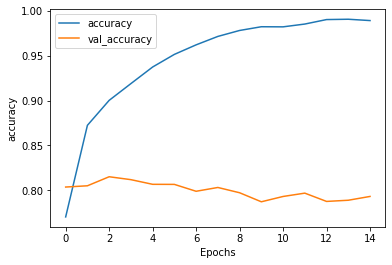

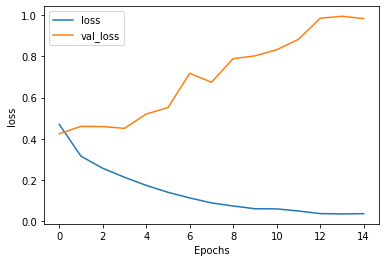

In [118]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [117]:
#Layer 0 is the Embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


## cnn

In [119]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128,5, activation='relu'),
     tf.keras.layers.GlobalAveragePooling1D(),#Flatten(),  # 
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 172,449
Trainable params: 172,449
Non-trainable params: 0
_________________________________________________________________


# Using predifine token

In [120]:
num_epochs = 15
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15


22816/25000 [==========================>...] - ETA: 7:50 - loss: 0.6927 - accuracy: 0.59 - ETA: 1:42 - loss: 0.6921 - accuracy: 0.57 - ETA: 1:01 - loss: 0.6941 - accuracy: 0.50 - ETA: 45s - loss: 0.6943 - accuracy: 0.4904 - ETA: 37s - loss: 0.6941 - accuracy: 0.489 - ETA: 31s - loss: 0.6940 - accuracy: 0.488 - ETA: 29s - loss: 0.6938 - accuracy: 0.490 - ETA: 27s - loss: 0.6937 - accuracy: 0.496 - ETA: 26s - loss: 0.6936 - accuracy: 0.500 - ETA: 24s - loss: 0.6935 - accuracy: 0.502 - ETA: 23s - loss: 0.6934 - accuracy: 0.512 - ETA: 22s - loss: 0.6933 - accuracy: 0.510 - ETA: 21s - loss: 0.6931 - accuracy: 0.513 - ETA: 20s - loss: 0.6930 - accuracy: 0.517 - ETA: 19s - loss: 0.6927 - accuracy: 0.529 - ETA: 19s - loss: 0.6926 - accuracy: 0.530 - ETA: 18s - loss: 0.6922 - accuracy: 0.539 - ETA: 17s - loss: 0.6920 - accuracy: 0.540 - ETA: 17s - loss: 0.6918 - accuracy: 0.542 - ETA: 17s - loss: 0.6912 - accuracy: 0.553 - ETA: 16s - loss: 0.6907 - accuracy: 0.556 - ETA: 16s - loss: 0.6899 - ac

25000/25000 [==============================] - ETA: 1s - loss: 0.4547 - accuracy: 0.78 - ETA: 0s - loss: 0.4549 - accuracy: 0.78 - ETA: 0s - loss: 0.4545 - accuracy: 0.78 - ETA: 0s - loss: 0.4539 - accuracy: 0.78 - ETA: 0s - loss: 0.4534 - accuracy: 0.78 - ETA: 0s - loss: 0.4528 - accuracy: 0.78 - ETA: 0s - loss: 0.4527 - accuracy: 0.78 - ETA: 0s - loss: 0.4525 - accuracy: 0.78 - ETA: 0s - loss: 0.4516 - accuracy: 0.78 - ETA: 0s - loss: 0.4515 - accuracy: 0.78 - ETA: 0s - loss: 0.4512 - accuracy: 0.78 - ETA: 0s - loss: 0.4510 - accuracy: 0.78 - ETA: 0s - loss: 0.4509 - accuracy: 0.78 - ETA: 0s - loss: 0.4507 - accuracy: 0.78 - ETA: 0s - loss: 0.4500 - accuracy: 0.78 - ETA: 0s - loss: 0.4497 - accuracy: 0.78 - ETA: 0s - loss: 0.4493 - accuracy: 0.78 - ETA: 0s - loss: 0.4487 - accuracy: 0.78 - 16s 645us/sample - loss: 0.4487 - accuracy: 0.7844 - val_loss: 0.3775 - val_accuracy: 0.8319
Epoch 2/15


23488/25000 [===========================>..] - ETA: 15s - loss: 0.4166 - accuracy: 0.812 - ETA: 14s - loss: 0.3143 - accuracy: 0.875 - ETA: 12s - loss: 0.3005 - accuracy: 0.875 - ETA: 12s - loss: 0.3028 - accuracy: 0.893 - ETA: 11s - loss: 0.3150 - accuracy: 0.884 - ETA: 12s - loss: 0.2975 - accuracy: 0.899 - ETA: 12s - loss: 0.2917 - accuracy: 0.903 - ETA: 12s - loss: 0.2805 - accuracy: 0.907 - ETA: 12s - loss: 0.2772 - accuracy: 0.905 - ETA: 12s - loss: 0.2741 - accuracy: 0.905 - ETA: 13s - loss: 0.2771 - accuracy: 0.904 - ETA: 12s - loss: 0.2816 - accuracy: 0.902 - ETA: 12s - loss: 0.2720 - accuracy: 0.904 - ETA: 12s - loss: 0.2730 - accuracy: 0.902 - ETA: 12s - loss: 0.2779 - accuracy: 0.896 - ETA: 12s - loss: 0.2835 - accuracy: 0.891 - ETA: 11s - loss: 0.2834 - accuracy: 0.890 - ETA: 11s - loss: 0.2868 - accuracy: 0.890 - ETA: 11s - loss: 0.2806 - accuracy: 0.894 - ETA: 11s - loss: 0.2833 - accuracy: 0.892 - ETA: 11s - loss: 0.2862 - accuracy: 0.889 - ETA: 11s - loss: 0.2853 - acc

25000/25000 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.87 - ETA: 0s - loss: 0.2965 - accuracy: 0.87 - ETA: 0s - loss: 0.2965 - accuracy: 0.87 - ETA: 0s - loss: 0.2967 - accuracy: 0.87 - ETA: 0s - loss: 0.2966 - accuracy: 0.87 - ETA: 0s - loss: 0.2963 - accuracy: 0.87 - ETA: 0s - loss: 0.2968 - accuracy: 0.87 - ETA: 0s - loss: 0.2970 - accuracy: 0.87 - ETA: 0s - loss: 0.2971 - accuracy: 0.87 - ETA: 0s - loss: 0.2976 - accuracy: 0.87 - ETA: 0s - loss: 0.2976 - accuracy: 0.87 - ETA: 0s - loss: 0.2980 - accuracy: 0.87 - 15s 605us/sample - loss: 0.2981 - accuracy: 0.8758 - val_loss: 0.3841 - val_accuracy: 0.8281
Epoch 3/15


25000/25000 [==============================] - ETA: 14s - loss: 0.2984 - accuracy: 0.812 - ETA: 11s - loss: 0.2097 - accuracy: 0.906 - ETA: 11s - loss: 0.2155 - accuracy: 0.913 - ETA: 10s - loss: 0.2131 - accuracy: 0.920 - ETA: 10s - loss: 0.2225 - accuracy: 0.917 - ETA: 10s - loss: 0.2145 - accuracy: 0.922 - ETA: 10s - loss: 0.2089 - accuracy: 0.925 - ETA: 10s - loss: 0.2056 - accuracy: 0.922 - ETA: 10s - loss: 0.2021 - accuracy: 0.928 - ETA: 10s - loss: 0.2009 - accuracy: 0.928 - ETA: 10s - loss: 0.2056 - accuracy: 0.926 - ETA: 10s - loss: 0.2018 - accuracy: 0.930 - ETA: 10s - loss: 0.2038 - accuracy: 0.929 - ETA: 10s - loss: 0.2132 - accuracy: 0.928 - ETA: 10s - loss: 0.2160 - accuracy: 0.926 - ETA: 10s - loss: 0.2145 - accuracy: 0.925 - ETA: 9s - loss: 0.2159 - accuracy: 0.924 - ETA: 9s - loss: 0.2131 - accuracy: 0.92 - ETA: 9s - loss: 0.2110 - accuracy: 0.92 - ETA: 9s - loss: 0.2143 - accuracy: 0.92 - ETA: 9s - loss: 0.2121 - accuracy: 0.92 - ETA: 9s - loss: 0.2167 - accuracy: 0.9

Epoch 4/15
25000/25000 [==============================] - ETA: 14s - loss: 0.1193 - accuracy: 0.968 - ETA: 11s - loss: 0.1753 - accuracy: 0.950 - ETA: 10s - loss: 0.2001 - accuracy: 0.934 - ETA: 10s - loss: 0.2288 - accuracy: 0.927 - ETA: 10s - loss: 0.2060 - accuracy: 0.935 - ETA: 10s - loss: 0.1958 - accuracy: 0.934 - ETA: 10s - loss: 0.1963 - accuracy: 0.933 - ETA: 10s - loss: 0.1967 - accuracy: 0.933 - ETA: 10s - loss: 0.1958 - accuracy: 0.933 - ETA: 10s - loss: 0.1919 - accuracy: 0.935 - ETA: 10s - loss: 0.1954 - accuracy: 0.934 - ETA: 10s - loss: 0.1904 - accuracy: 0.936 - ETA: 10s - loss: 0.1868 - accuracy: 0.939 - ETA: 10s - loss: 0.1828 - accuracy: 0.941 - ETA: 9s - loss: 0.1823 - accuracy: 0.941 - ETA: 9s - loss: 0.1824 - accuracy: 0.94 - ETA: 9s - loss: 0.1804 - accuracy: 0.94 - ETA: 9s - loss: 0.1849 - accuracy: 0.94 - ETA: 9s - loss: 0.1822 - accuracy: 0.94 - ETA: 9s - loss: 0.1853 - accuracy: 0.94 - ETA: 9s - loss: 0.1846 - accuracy: 0.94 - ETA: 9s - loss: 0.1859 - accura

Epoch 5/15


23776/25000 [===========================>..] - ETA: 14s - loss: 0.1442 - accuracy: 0.937 - ETA: 10s - loss: 0.1092 - accuracy: 0.968 - ETA: 10s - loss: 0.1266 - accuracy: 0.962 - ETA: 11s - loss: 0.1345 - accuracy: 0.954 - ETA: 11s - loss: 0.1291 - accuracy: 0.959 - ETA: 11s - loss: 0.1282 - accuracy: 0.958 - ETA: 10s - loss: 0.1353 - accuracy: 0.957 - ETA: 10s - loss: 0.1313 - accuracy: 0.961 - ETA: 10s - loss: 0.1363 - accuracy: 0.959 - ETA: 10s - loss: 0.1360 - accuracy: 0.960 - ETA: 10s - loss: 0.1350 - accuracy: 0.959 - ETA: 10s - loss: 0.1387 - accuracy: 0.957 - ETA: 10s - loss: 0.1347 - accuracy: 0.960 - ETA: 10s - loss: 0.1366 - accuracy: 0.957 - ETA: 10s - loss: 0.1387 - accuracy: 0.958 - ETA: 10s - loss: 0.1377 - accuracy: 0.959 - ETA: 10s - loss: 0.1400 - accuracy: 0.958 - ETA: 10s - loss: 0.1377 - accuracy: 0.958 - ETA: 10s - loss: 0.1335 - accuracy: 0.961 - ETA: 10s - loss: 0.1319 - accuracy: 0.961 - ETA: 10s - loss: 0.1338 - accuracy: 0.960 - ETA: 10s - loss: 0.1352 - acc

25000/25000 [==============================] - ETA: 0s - loss: 0.1618 - accuracy: 0.94 - ETA: 0s - loss: 0.1616 - accuracy: 0.94 - ETA: 0s - loss: 0.1620 - accuracy: 0.94 - ETA: 0s - loss: 0.1621 - accuracy: 0.94 - ETA: 0s - loss: 0.1622 - accuracy: 0.94 - ETA: 0s - loss: 0.1624 - accuracy: 0.94 - ETA: 0s - loss: 0.1624 - accuracy: 0.94 - ETA: 0s - loss: 0.1626 - accuracy: 0.94 - ETA: 0s - loss: 0.1626 - accuracy: 0.94 - 14s 569us/sample - loss: 0.1630 - accuracy: 0.9425 - val_loss: 0.5130 - val_accuracy: 0.8062
Epoch 6/15


24032/25000 [===========================>..] - ETA: 14s - loss: 0.1261 - accuracy: 0.968 - ETA: 11s - loss: 0.1097 - accuracy: 0.968 - ETA: 11s - loss: 0.0961 - accuracy: 0.975 - ETA: 11s - loss: 0.1046 - accuracy: 0.968 - ETA: 10s - loss: 0.1083 - accuracy: 0.966 - ETA: 10s - loss: 0.1019 - accuracy: 0.968 - ETA: 10s - loss: 0.0966 - accuracy: 0.971 - ETA: 10s - loss: 0.0941 - accuracy: 0.973 - ETA: 10s - loss: 0.1067 - accuracy: 0.969 - ETA: 10s - loss: 0.1036 - accuracy: 0.970 - ETA: 10s - loss: 0.1017 - accuracy: 0.970 - ETA: 10s - loss: 0.1042 - accuracy: 0.970 - ETA: 10s - loss: 0.1036 - accuracy: 0.971 - ETA: 10s - loss: 0.1047 - accuracy: 0.971 - ETA: 10s - loss: 0.1042 - accuracy: 0.969 - ETA: 10s - loss: 0.1102 - accuracy: 0.967 - ETA: 10s - loss: 0.1063 - accuracy: 0.969 - ETA: 9s - loss: 0.1037 - accuracy: 0.971 - ETA: 9s - loss: 0.1059 - accuracy: 0.97 - ETA: 9s - loss: 0.1076 - accuracy: 0.97 - ETA: 9s - loss: 0.1071 - accuracy: 0.97 - ETA: 9s - loss: 0.1071 - accuracy: 0

25000/25000 [==============================] - ETA: 0s - loss: 0.1312 - accuracy: 0.95 - ETA: 0s - loss: 0.1317 - accuracy: 0.95 - ETA: 0s - loss: 0.1316 - accuracy: 0.95 - ETA: 0s - loss: 0.1317 - accuracy: 0.95 - ETA: 0s - loss: 0.1320 - accuracy: 0.95 - ETA: 0s - loss: 0.1321 - accuracy: 0.95 - ETA: 0s - loss: 0.1324 - accuracy: 0.95 - 14s 561us/sample - loss: 0.1324 - accuracy: 0.9558 - val_loss: 0.5903 - val_accuracy: 0.8007
Epoch 7/15


24384/25000 [============================>.] - ETA: 14s - loss: 0.1653 - accuracy: 0.968 - ETA: 11s - loss: 0.0769 - accuracy: 0.987 - ETA: 11s - loss: 0.0743 - accuracy: 0.979 - ETA: 10s - loss: 0.0771 - accuracy: 0.975 - ETA: 10s - loss: 0.0820 - accuracy: 0.974 - ETA: 10s - loss: 0.0754 - accuracy: 0.978 - ETA: 9s - loss: 0.0764 - accuracy: 0.979 - ETA: 9s - loss: 0.0873 - accuracy: 0.97 - ETA: 9s - loss: 0.0860 - accuracy: 0.97 - ETA: 9s - loss: 0.0858 - accuracy: 0.97 - ETA: 9s - loss: 0.0851 - accuracy: 0.97 - ETA: 9s - loss: 0.0836 - accuracy: 0.97 - ETA: 9s - loss: 0.0826 - accuracy: 0.97 - ETA: 9s - loss: 0.0845 - accuracy: 0.97 - ETA: 9s - loss: 0.0860 - accuracy: 0.97 - ETA: 9s - loss: 0.0899 - accuracy: 0.97 - ETA: 9s - loss: 0.0888 - accuracy: 0.97 - ETA: 9s - loss: 0.0893 - accuracy: 0.97 - ETA: 9s - loss: 0.0904 - accuracy: 0.97 - ETA: 9s - loss: 0.0917 - accuracy: 0.97 - ETA: 9s - loss: 0.0914 - accuracy: 0.97 - ETA: 9s - loss: 0.0913 - accuracy: 0.97 - ETA: 9s - loss: 

25000/25000 [==============================] - ETA: 0s - loss: 0.1055 - accuracy: 0.96 - ETA: 0s - loss: 0.1055 - accuracy: 0.96 - ETA: 0s - loss: 0.1056 - accuracy: 0.96 - ETA: 0s - loss: 0.1055 - accuracy: 0.96 - ETA: 0s - loss: 0.1056 - accuracy: 0.96 - 14s 559us/sample - loss: 0.1056 - accuracy: 0.9661 - val_loss: 0.6678 - val_accuracy: 0.7932
Epoch 8/15


24992/25000 [============================>.] - ETA: 15s - loss: 0.0339 - accuracy: 1.000 - ETA: 11s - loss: 0.1274 - accuracy: 0.962 - ETA: 11s - loss: 0.0944 - accuracy: 0.972 - ETA: 10s - loss: 0.0803 - accuracy: 0.976 - ETA: 10s - loss: 0.0818 - accuracy: 0.977 - ETA: 10s - loss: 0.0738 - accuracy: 0.980 - ETA: 10s - loss: 0.0730 - accuracy: 0.980 - ETA: 10s - loss: 0.0690 - accuracy: 0.981 - ETA: 10s - loss: 0.0674 - accuracy: 0.983 - ETA: 9s - loss: 0.0776 - accuracy: 0.980 - ETA: 9s - loss: 0.0754 - accuracy: 0.98 - ETA: 9s - loss: 0.0722 - accuracy: 0.98 - ETA: 9s - loss: 0.0721 - accuracy: 0.98 - ETA: 9s - loss: 0.0731 - accuracy: 0.98 - ETA: 9s - loss: 0.0698 - accuracy: 0.98 - ETA: 9s - loss: 0.0675 - accuracy: 0.98 - ETA: 9s - loss: 0.0660 - accuracy: 0.98 - ETA: 9s - loss: 0.0664 - accuracy: 0.98 - ETA: 9s - loss: 0.0678 - accuracy: 0.98 - ETA: 9s - loss: 0.0692 - accuracy: 0.98 - ETA: 9s - loss: 0.0686 - accuracy: 0.98 - ETA: 9s - loss: 0.0719 - accuracy: 0.97 - ETA: 8s - 

25000/25000 [==============================] - 14s 555us/sample - loss: 0.0826 - accuracy: 0.9744 - val_loss: 0.7829 - val_accuracy: 0.7922
Epoch 9/15


25000/25000 [==============================] - ETA: 13s - loss: 0.0205 - accuracy: 1.000 - ETA: 12s - loss: 0.0650 - accuracy: 0.981 - ETA: 11s - loss: 0.0497 - accuracy: 0.986 - ETA: 11s - loss: 0.0423 - accuracy: 0.990 - ETA: 11s - loss: 0.0405 - accuracy: 0.990 - ETA: 10s - loss: 0.0481 - accuracy: 0.991 - ETA: 10s - loss: 0.0451 - accuracy: 0.992 - ETA: 10s - loss: 0.0468 - accuracy: 0.990 - ETA: 10s - loss: 0.0479 - accuracy: 0.990 - ETA: 10s - loss: 0.0520 - accuracy: 0.990 - ETA: 10s - loss: 0.0564 - accuracy: 0.987 - ETA: 10s - loss: 0.0560 - accuracy: 0.987 - ETA: 10s - loss: 0.0537 - accuracy: 0.988 - ETA: 10s - loss: 0.0573 - accuracy: 0.987 - ETA: 9s - loss: 0.0614 - accuracy: 0.986 - ETA: 9s - loss: 0.0587 - accuracy: 0.98 - ETA: 9s - loss: 0.0564 - accuracy: 0.98 - ETA: 9s - loss: 0.0552 - accuracy: 0.98 - ETA: 9s - loss: 0.0540 - accuracy: 0.98 - ETA: 9s - loss: 0.0536 - accuracy: 0.98 - ETA: 9s - loss: 0.0530 - accuracy: 0.98 - ETA: 9s - loss: 0.0526 - accuracy: 0.98 - 

Epoch 10/15
25000/25000 [==============================] - ETA: 12s - loss: 0.0222 - accuracy: 1.000 - ETA: 11s - loss: 0.0230 - accuracy: 0.993 - ETA: 10s - loss: 0.0318 - accuracy: 0.989 - ETA: 10s - loss: 0.0335 - accuracy: 0.990 - ETA: 10s - loss: 0.0325 - accuracy: 0.990 - ETA: 10s - loss: 0.0325 - accuracy: 0.991 - ETA: 10s - loss: 0.0330 - accuracy: 0.991 - ETA: 10s - loss: 0.0320 - accuracy: 0.992 - ETA: 9s - loss: 0.0403 - accuracy: 0.989 - ETA: 9s - loss: 0.0403 - accuracy: 0.98 - ETA: 9s - loss: 0.0380 - accuracy: 0.98 - ETA: 9s - loss: 0.0348 - accuracy: 0.99 - ETA: 9s - loss: 0.0345 - accuracy: 0.99 - ETA: 9s - loss: 0.0382 - accuracy: 0.99 - ETA: 9s - loss: 0.0368 - accuracy: 0.99 - ETA: 9s - loss: 0.0357 - accuracy: 0.99 - ETA: 9s - loss: 0.0351 - accuracy: 0.99 - ETA: 9s - loss: 0.0344 - accuracy: 0.99 - ETA: 9s - loss: 0.0331 - accuracy: 0.99 - ETA: 9s - loss: 0.0347 - accuracy: 0.99 - ETA: 9s - loss: 0.0353 - accuracy: 0.99 - ETA: 9s - loss: 0.0356 - accuracy: 0.99 - 

25000/25000 [==============================] - ETA: 12s - loss: 0.0272 - accuracy: 1.000 - ETA: 11s - loss: 0.0315 - accuracy: 0.993 - ETA: 11s - loss: 0.0383 - accuracy: 0.989 - ETA: 10s - loss: 0.0318 - accuracy: 0.992 - ETA: 10s - loss: 0.0318 - accuracy: 0.991 - ETA: 9s - loss: 0.0303 - accuracy: 0.991 - ETA: 10s - loss: 0.0282 - accuracy: 0.992 - ETA: 10s - loss: 0.0284 - accuracy: 0.991 - ETA: 10s - loss: 0.0259 - accuracy: 0.992 - ETA: 9s - loss: 0.0255 - accuracy: 0.992 - ETA: 9s - loss: 0.0237 - accuracy: 0.99 - ETA: 9s - loss: 0.0231 - accuracy: 0.99 - ETA: 9s - loss: 0.0224 - accuracy: 0.99 - ETA: 9s - loss: 0.0217 - accuracy: 0.99 - ETA: 9s - loss: 0.0243 - accuracy: 0.99 - ETA: 9s - loss: 0.0238 - accuracy: 0.99 - ETA: 9s - loss: 0.0255 - accuracy: 0.99 - ETA: 9s - loss: 0.0248 - accuracy: 0.99 - ETA: 9s - loss: 0.0237 - accuracy: 0.99 - ETA: 9s - loss: 0.0232 - accuracy: 0.99 - ETA: 9s - loss: 0.0230 - accuracy: 0.99 - ETA: 9s - loss: 0.0231 - accuracy: 0.99 - ETA: 9s - l

24192/25000 [============================>.] - ETA: 14s - loss: 0.0034 - accuracy: 1.000 - ETA: 11s - loss: 0.0315 - accuracy: 0.993 - ETA: 11s - loss: 0.0346 - accuracy: 0.989 - ETA: 11s - loss: 0.0344 - accuracy: 0.988 - ETA: 11s - loss: 0.0340 - accuracy: 0.987 - ETA: 10s - loss: 0.0317 - accuracy: 0.988 - ETA: 10s - loss: 0.0290 - accuracy: 0.990 - ETA: 10s - loss: 0.0280 - accuracy: 0.990 - ETA: 10s - loss: 0.0291 - accuracy: 0.990 - ETA: 10s - loss: 0.0273 - accuracy: 0.991 - ETA: 10s - loss: 0.0272 - accuracy: 0.991 - ETA: 10s - loss: 0.0262 - accuracy: 0.991 - ETA: 10s - loss: 0.0261 - accuracy: 0.991 - ETA: 10s - loss: 0.0305 - accuracy: 0.990 - ETA: 10s - loss: 0.0301 - accuracy: 0.990 - ETA: 10s - loss: 0.0285 - accuracy: 0.991 - ETA: 10s - loss: 0.0272 - accuracy: 0.991 - ETA: 10s - loss: 0.0263 - accuracy: 0.992 - ETA: 10s - loss: 0.0272 - accuracy: 0.991 - ETA: 10s - loss: 0.0289 - accuracy: 0.991 - ETA: 10s - loss: 0.0312 - accuracy: 0.990 - ETA: 10s - loss: 0.0305 - acc

25000/25000 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0290 - accuracy: 0.99 - ETA: 0s - loss: 0.0289 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - 14s 574us/sample - loss: 0.0288 - accuracy: 0.9919 - val_loss: 1.2872 - val_accuracy: 0.7831
Epoch 13/15


24448/25000 [============================>.] - ETA: 14s - loss: 0.0153 - accuracy: 1.000 - ETA: 13s - loss: 0.0080 - accuracy: 1.000 - ETA: 13s - loss: 0.0245 - accuracy: 0.991 - ETA: 12s - loss: 0.0252 - accuracy: 0.991 - ETA: 11s - loss: 0.0226 - accuracy: 0.991 - ETA: 11s - loss: 0.0204 - accuracy: 0.993 - ETA: 11s - loss: 0.0259 - accuracy: 0.987 - ETA: 11s - loss: 0.0236 - accuracy: 0.989 - ETA: 10s - loss: 0.0255 - accuracy: 0.987 - ETA: 10s - loss: 0.0231 - accuracy: 0.989 - ETA: 10s - loss: 0.0218 - accuracy: 0.990 - ETA: 10s - loss: 0.0203 - accuracy: 0.991 - ETA: 10s - loss: 0.0197 - accuracy: 0.992 - ETA: 10s - loss: 0.0186 - accuracy: 0.992 - ETA: 10s - loss: 0.0200 - accuracy: 0.992 - ETA: 10s - loss: 0.0213 - accuracy: 0.991 - ETA: 10s - loss: 0.0212 - accuracy: 0.991 - ETA: 10s - loss: 0.0206 - accuracy: 0.992 - ETA: 10s - loss: 0.0206 - accuracy: 0.992 - ETA: 10s - loss: 0.0199 - accuracy: 0.992 - ETA: 10s - loss: 0.0211 - accuracy: 0.992 - ETA: 9s - loss: 0.0202 - accu

25000/25000 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.99 - ETA: 0s - loss: 0.0245 - accuracy: 0.99 - ETA: 0s - loss: 0.0244 - accuracy: 0.99 - ETA: 0s - loss: 0.0245 - accuracy: 0.99 - 14s 551us/sample - loss: 0.0245 - accuracy: 0.9924 - val_loss: 1.3760 - val_accuracy: 0.7814
Epoch 14/15


24832/25000 [============================>.] - ETA: 14s - loss: 0.0032 - accuracy: 1.000 - ETA: 11s - loss: 0.0038 - accuracy: 1.000 - ETA: 10s - loss: 0.0040 - accuracy: 1.000 - ETA: 10s - loss: 0.0033 - accuracy: 1.000 - ETA: 10s - loss: 0.0055 - accuracy: 0.998 - ETA: 10s - loss: 0.0062 - accuracy: 0.997 - ETA: 10s - loss: 0.0080 - accuracy: 0.995 - ETA: 10s - loss: 0.0099 - accuracy: 0.994 - ETA: 10s - loss: 0.0092 - accuracy: 0.995 - ETA: 9s - loss: 0.0096 - accuracy: 0.995 - ETA: 9s - loss: 0.0150 - accuracy: 0.99 - ETA: 9s - loss: 0.0145 - accuracy: 0.99 - ETA: 9s - loss: 0.0157 - accuracy: 0.99 - ETA: 9s - loss: 0.0186 - accuracy: 0.99 - ETA: 9s - loss: 0.0180 - accuracy: 0.99 - ETA: 9s - loss: 0.0171 - accuracy: 0.99 - ETA: 9s - loss: 0.0163 - accuracy: 0.99 - ETA: 9s - loss: 0.0201 - accuracy: 0.99 - ETA: 9s - loss: 0.0193 - accuracy: 0.99 - ETA: 9s - loss: 0.0189 - accuracy: 0.99 - ETA: 9s - loss: 0.0182 - accuracy: 0.99 - ETA: 9s - loss: 0.0181 - accuracy: 0.99 - ETA: 9s - 

25000/25000 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.99 - 14s 551us/sample - loss: 0.0162 - accuracy: 0.9950 - val_loss: 1.5387 - val_accuracy: 0.7820
Epoch 15/15


24896/25000 [============================>.] - ETA: 15s - loss: 5.1201e-04 - accuracy: 1.000 - ETA: 11s - loss: 0.0049 - accuracy: 1.0000    - ETA: 11s - loss: 0.0214 - accuracy: 0.996 - ETA: 10s - loss: 0.0194 - accuracy: 0.997 - ETA: 10s - loss: 0.0198 - accuracy: 0.996 - ETA: 10s - loss: 0.0180 - accuracy: 0.997 - ETA: 10s - loss: 0.0165 - accuracy: 0.996 - ETA: 10s - loss: 0.0161 - accuracy: 0.995 - ETA: 10s - loss: 0.0148 - accuracy: 0.996 - ETA: 10s - loss: 0.0145 - accuracy: 0.995 - ETA: 10s - loss: 0.0150 - accuracy: 0.996 - ETA: 10s - loss: 0.0151 - accuracy: 0.995 - ETA: 10s - loss: 0.0144 - accuracy: 0.996 - ETA: 10s - loss: 0.0139 - accuracy: 0.996 - ETA: 10s - loss: 0.0132 - accuracy: 0.996 - ETA: 9s - loss: 0.0124 - accuracy: 0.996 - ETA: 9s - loss: 0.0129 - accuracy: 0.99 - ETA: 9s - loss: 0.0133 - accuracy: 0.99 - ETA: 9s - loss: 0.0128 - accuracy: 0.99 - ETA: 9s - loss: 0.0125 - accuracy: 0.99 - ETA: 9s - loss: 0.0124 - accuracy: 0.99 - ETA: 9s - loss: 0.0124 - accurac

25000/25000 [==============================] - 14s 548us/sample - loss: 0.0134 - accuracy: 0.9959 - val_loss: 1.6709 - val_accuracy: 0.7789


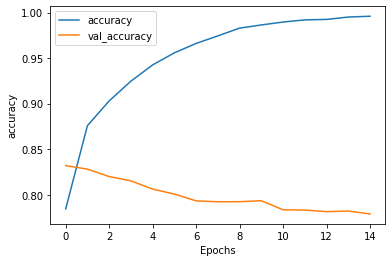

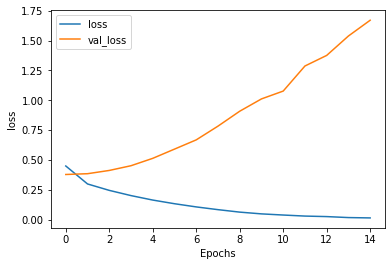

In [121]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [55]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dataset imdb_reviews downloaded and prepared to C:\Users\jingy\tensorflow_datasets\imdb_reviews\subwords8k\0.1.0. Subsequent calls will reuse this data.


W0830 18:48:28.558137  5184 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [ ]:
tokenizer = info.features['text'].encoder